
Some general informations about dblp_v14

    Total papers: 5259858

    Total citations: 134537770

    Total references (Citation Relationship): 36630661

    Mean citations (citations/papers): 25.57821332819251

    Mean references (references/papers): 6.9641919990995955

    Total authors (v14 and v12) without repetitions/empty authors dblpv14: 6407370


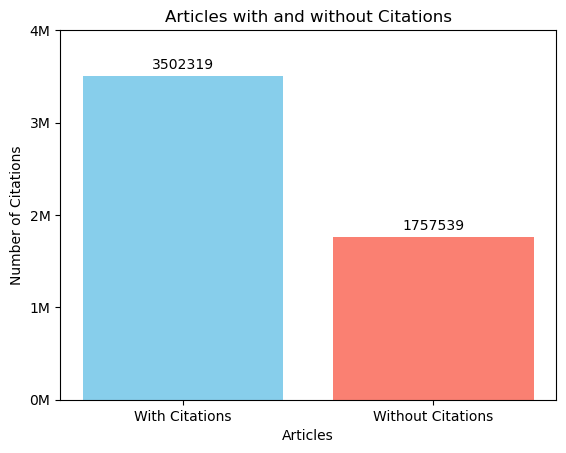

In [5]:
# counting number of papers inside of the json dataset
# subtract 1 from the final result because the first line of
# the dataset is the [ character and not a paper
def count_lines_in_json(json_file_path):
    try:
        line_count = 0 
        with open(json_file_path, 'r') as file:
            for line in file:
                line_count += 1 # each line is a paper in the json dataset
        return line_count
    except FileNotFoundError:
        return "File not found."


# total citations in the json dataset
import json
def sum_n_citations_from_json(json_data):
    try:
        total_sum = 0
        for entry in json_data:
            n_citations = entry.get("n_citation", 0)  # Get "n_citation" value or 0 if not present
            if isinstance(n_citations, int):  # Check if n_citations is an integer
                total_sum += n_citations
        return total_sum
    except json.JSONDecodeError:
        return "Invalid JSON format."


# total references (citation relationship) in the json dataset
import json
def sum_references_length(json_data):
    try:
        total_length = 0
        for entry in json_data:
            references = entry.get("references", [])  # Get "n_citation" value or empty list if not present
            if isinstance(references, list):  # Check if n_citations is a list
                total_length += len(references)  # Add length of n_citations list to total_length
        return total_length
    except json.JSONDecodeError:
        return "Invalid JSON format."
   
    
#creates a graph showing if the majority of papers has citations
import json
import matplotlib.pyplot as plt
import numpy as np
def create_citations_graph(json_data):
    try:
        # Extract citation counts from the JSON data
        citation_counts = list(json_data.values())

        # Count the number of articles with and without citations
        articles_with_citations = sum(1 for count in citation_counts if count > 0)
        articles_without_citations = len(citation_counts) - articles_with_citations

        # Set up the plot
        fig, ax = plt.subplots()
        bars = ax.bar(['With Citations', 'Without Citations'], [articles_with_citations, articles_without_citations], color=['skyblue', 'salmon'])

        # Set the y-axis ticks and labels to be in steps of 1 million
        plt.yticks(np.arange(0, 6000000, 1000000), [f'{i//1000000}M' for i in range(0, 6000000, 1000000)])

        # Limit the y-axis to 5 million
        plt.ylim(0, 4000000)

        # Add labels and title
        plt.xlabel('Articles')
        plt.ylabel('Number of Citations')
        plt.title('Articles with and without Citations')

        # Add text labels on top of the bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")


#creating a dataframe from json dataset and save it on csv file       
import pandas as pd
def create_dataframe_from_json(json_file_path, output_file_path=None):
    try:
        # Read the JSON file and create a DataFrame
        df = pd.read_json(json_file_path)

        # Save the DataFrame to a CSV file if output_file_path is provided
        if output_file_path:
            df.to_csv(output_file_path, index=False)

        # Return the DataFrame
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    
#It creates a json dictionary containing all papers ids with their list of author associated 
import json
def extract_paper_author_ids_to_json(json_d, output_json_path):
    paper_author_mapping = {}  # Dictionary to store paper IDs and their associated author IDs
    for entry in json_d:
        paper_id = entry.get("id")
        author_ids = [author["id"] for author in entry.get("authors", [])]
        paper_author_mapping[paper_id] = author_ids
    
    # Writing paper_author_mapping to the output JSON file
    with open(output_json_path, 'w') as output_file:
        json.dump(paper_author_mapping, output_file)
        

import json
#count the number of unique not empty authors from main dataset
def extract_author_ids(json_data):
    try:
        all_author_ids_set = set()  # Initialize an empty set to store all author IDs
        for entry in json_data:
            authors = entry.get("authors", [])  # Get the list of authors for the entry
            for author in authors:
                author_id = author.get("id", "")  # Get the author ID
                if isinstance(author_id, str) and author_id:  # Check if author_id is a non-empty string
                    all_author_ids_set.add(author_id)  # Add author ID to the set
            
            v12_authors = entry.get("v12_authors", [])  # Get the list of v12 authors for the entry
            for author in v12_authors:
                v12_author_id = author.get("id", "")  # Get the v12_author ID
                if isinstance(v12_author_id, int) and v12_author_id:  # Check if v12_author_id is a non-zero integer
                    all_author_ids_set.add(str(v12_author_id))  # Convert v12_author_id to string and add it to the set
        
        # Return the length of the merged string
        return len(all_author_ids_set)
    except json.JSONDecodeError:
        return "Invalid JSON format."
                
        
# function usage:
json_file_path = 'dblp_v14.json'
csv_file_path = 'pandas_dataframe.csv'
output_extract_paper_author_ids_to_json = 'paper_author_mapping.json'  # Path to the output JSON file
input_json_path = 'paper_author_mapping.json'

#with open(json_file_path, 'r') as file:
#    loaded_json_data = json.load(file)

loaded_dblp = loaded_json_data

print("\nSome general informations about dblp_v14")    
    
line_count = count_lines_in_json(json_file_path)
print("\n    Total papers:", line_count-1)

total = sum_n_citations_from_json(loaded_dblp)
print("\n    Total citations:", total)

total_length = sum_references_length(loaded_dblp)
print("\n    Total references (Citation Relationship):", total_length)

print("\n    Mean citations (citations/papers):", total/(line_count-1))
print("\n    Mean references (references/papers):", total_length/(line_count-1))

authors = extract_author_ids(loaded_dblp)
print("\n    Total authors (v14 and v12) without repetitions/empty authors dblpv14:", authors)

json_file_path_2 = 'n_citations_paper.json'
with open(json_file_path_2, 'r') as file:
    loaded_json_data_2 = json.load(file)
#creates a graph showing if the majority of papers has citations
create_citations_graph(loaded_json_data_2)

#creating a dataframe from json dataset
#output_file_path = "pandas_dataframe.csv"
#df = create_dataframe_from_json(json_file_path, output_file_path)

#It creates a json dictionary containing all papers ids with their list of author associated 
#extract_paper_author_ids_to_json(loaded_json_data, output_extract_paper_author_ids_to_json)

In [2]:
import json

def analyze_publications(data):
    total_n_citations = 0
    total_references = 0
    total_entries = len(data)
    
    for entry in data:
        total_n_citations += entry.get("n_citation", 0)
        total_references += len(entry.get("references", []))
    
    return total_n_citations, total_references, total_entries


import json
#count the number of unique not empty authors from new_map and papers intersection
def count_entries_with_v12_id(data):
    # Initialize sets to store non-empty author IDs and v12_author IDs
    non_empty_author_ids = set()
    non_empty_v12_author_ids = set()

    # Initialize a variable to count entries with non-empty v12_id
    entries_with_v12_id = 0
        
    # Iterate over each entry in the JSON data
    for entry in data:
        # Get the author IDs and v12_author_ids from the entry
        authors_ids = entry.get("authors_ids", [])
        v12_authors_ids = entry.get("v12_authors_id", [])
        v12_id = entry.get("v12_id")

        # Add non-empty author IDs to the set
        for author_id in authors_ids:
            if author_id.strip() != "":
                non_empty_author_ids.add(author_id)
        # Add non-empty v12_author IDs to the set
        for v12_author_id in v12_authors_ids:
            non_empty_v12_author_ids.add(str(v12_author_id))  # Ensure v12_author_id is a string
            
        # Check if the entry has a non-empty v12_id
        if v12_id is not None and v12_id != "":
            entries_with_v12_id += 1
    
    return len(non_empty_author_ids), len(non_empty_v12_author_ids), entries_with_v12_id


json_file_path = 'new_map_final.json'  # Replace 'publications.json' with the path to your JSON file
with open(json_file_path, 'r') as file:
        data = json.load(file)
n_citations, n_references, total_entries = analyze_publications(data)
print("\nSome general informations about new_map_final (cleaned dblp without empty strings and repetitions)")
print("\n    Total papers:", total_entries)
print("\n    Total citations:", n_citations)
print("\n    Total references (Citation Relationship):", n_references)
print("\n    Mean citations (citations/papers):", n_citations/total_entries)
print("\n    Mean references (references/papers):", n_references/total_entries)

non_empty_authors, non_empty_v12_authors, entries_with_v12_id = count_entries_with_v12_id(data)
print("\n    Non-empty author IDs:", non_empty_authors)
print("    Non-empty v12 author IDs:", non_empty_v12_authors)
print("    Entries with non-empty v12_id (both id and v12_id):", entries_with_v12_id)
print("\n    Total paper - papers with both id and v12_id(only v14 paper):", 5259858-entries_with_v12_id)


Some general informations about new_map_final (cleaned dblp without empty strings and repetitions)

    Total papers: 5259858

    Total citations: 134537770

    Total references (Citation Relationship): 32721379

    Mean citations (citations/papers): 25.57821332819251

    Mean references (references/papers): 6.220962429023749

    Non-empty author IDs: 2863644
    Non-empty v12 author IDs: 3543726
    Entries with non-empty v12_id (both id and v12_id): 3596351

    Total paper - papers with both id and v12_id(only v14 paper): 1663507


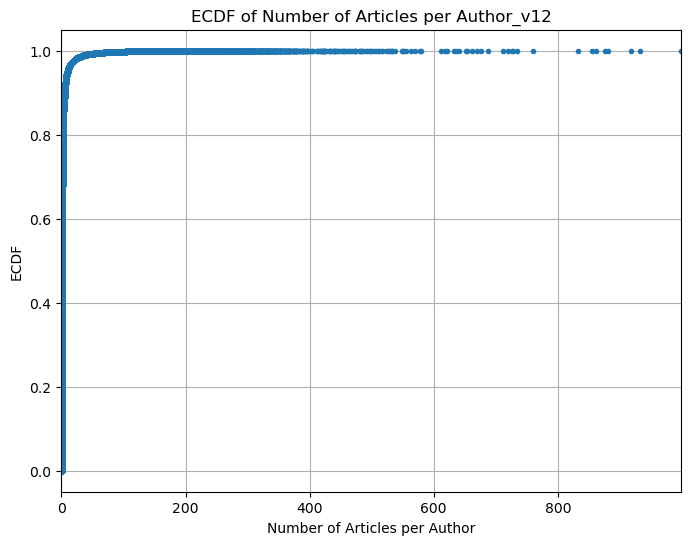

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt

def ecdf_articles_per_author(json_path):
    # Load the input JSON dictionary that contains authors list per article
    with open(json_path, 'r') as file:
        articles_per_author_dict = json.load(file)
    
    # Get the number of articles for each author
    articles_counts = list(articles_per_author_dict.values())
    
    # Sort the article counts
    articles_counts_sorted = np.sort(articles_counts)
    
    # Calculate the cumulative distribution function
    y = np.arange(1, len(articles_counts_sorted) + 1) / len(articles_counts_sorted)
    
    # Get the maximum number of articles by any author
    max_articles = max(articles_counts_sorted)
    
    # Plot the ECDF
    plt.figure(figsize=(8, 6))
    plt.plot(articles_counts_sorted, y, marker='.', linestyle='none')
    
    # Set the x-axis range based on the maximum number of articles
    plt.xlim(0, max_articles)
    
    # Add labels and title
    plt.xlabel('Number of Articles per Author')
    plt.ylabel('ECDF')
    plt.title('ECDF of Number of Articles per Author_v12')
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
articles_per_author_dict = '/home/students/mmiot/articles_per_author_v12.json'

ecdf_articles_per_author(articles_per_author_dict)

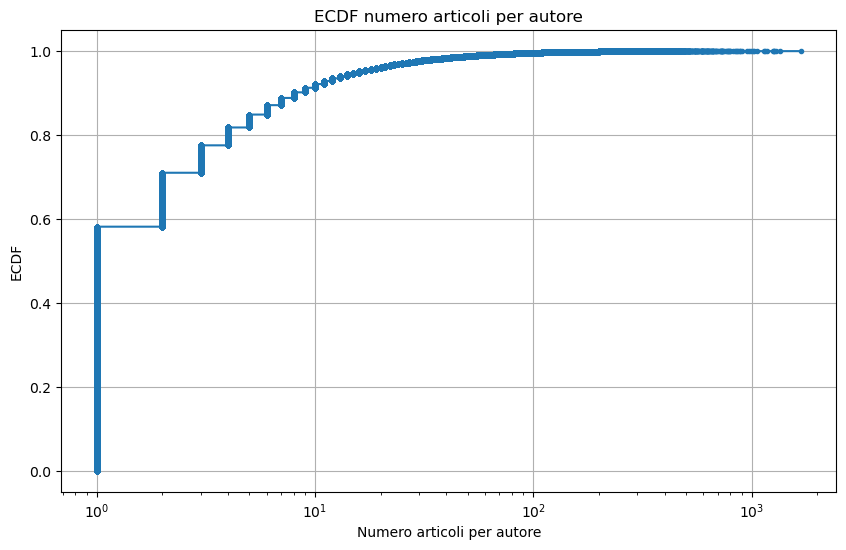

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_ecdf(data):
    # Extract values from the dictionary
    values = list(data.values())
    
    # Sort the values
    sorted_values = np.sort(values)
    
    # Calculate the ECDF values
    y = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    
    # Plot the ECDF
    plt.figure(figsize=(10, 6))
    plt.step(sorted_values, y, where="post", label="ECDF", marker=".")
    
    # Add labels and title
    plt.xlabel('Numero articoli per autore')
    plt.ylabel('ECDF')
    plt.title('ECDF numero articoli per autore')
    plt.grid(True)
    plt.xscale("log")

    plt.show()

# Example usage
json_file_path = '/home/students/mmiot/ArticlesPerAuthors/articles_per_author.json'

# Open the JSON file and load the data
with open(json_file_path, 'r') as file:
    data = json.load(file)
        
plot_cumulative_ecdf(data)

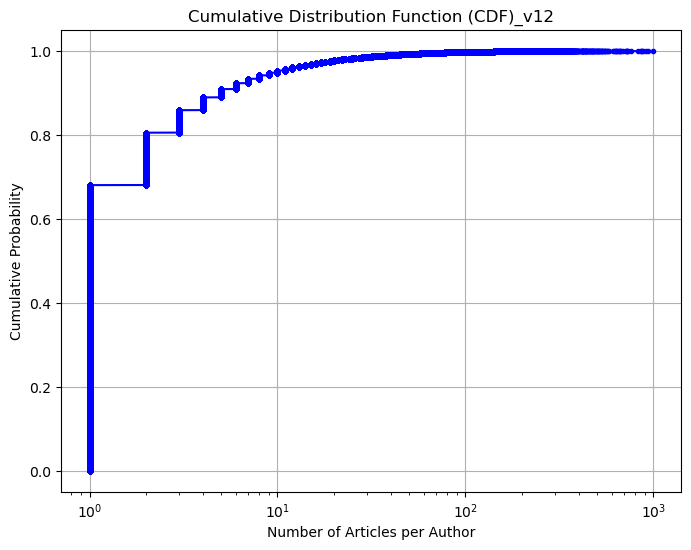

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_cdf(json_path):
    # Load the input JSON dictionary that contains authors list per article
    with open(json_path, 'r') as file:
        articles_per_author_dict = json.load(file)
    
    # Find the author with the highest number of articles
    author_with_most_articles = max(articles_per_author_dict, key=articles_per_author_dict.get)
    
    # Get the number of articles for the author with the most articles
    num_articles_most = articles_per_author_dict[author_with_most_articles]
    
    # Print the author to be removed and their number of articles
    #print("Author with the highest number of articles (to be removed):", author_with_most_articles)
    #print("Number of articles by this author:", num_articles_most)
    
    # Remove the entry corresponding to the author with the highest number of articles
    #del articles_per_author_dict[author_with_most_articles]
    
    # Convert the dictionary values to a numpy array
    articles_counts = np.array(list(articles_per_author_dict.values()))
    
    # Sort the article counts
    articles_counts_sorted = np.sort(articles_counts)
    
    # Calculate the cumulative distribution function
    cdf = np.arange(1, len(articles_counts_sorted) + 1) / len(articles_counts_sorted)
    
    return articles_counts_sorted, cdf

def plot_cdf(articles_per_author_dict):
    # Calculate the CDF
    articles_counts_sorted, cdf = calculate_cdf(articles_per_author_dict)
    
    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(articles_counts_sorted, cdf, marker='.', linestyle='-', color='b')
    
    # Add labels and title
    plt.xlabel('Number of Articles per Author')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution Function (CDF)_v12')
    plt.xscale('log')
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
articles_per_author_dict = '/home/students/mmiot/articles_per_author_v12.json'
plot_cdf(articles_per_author_dict)


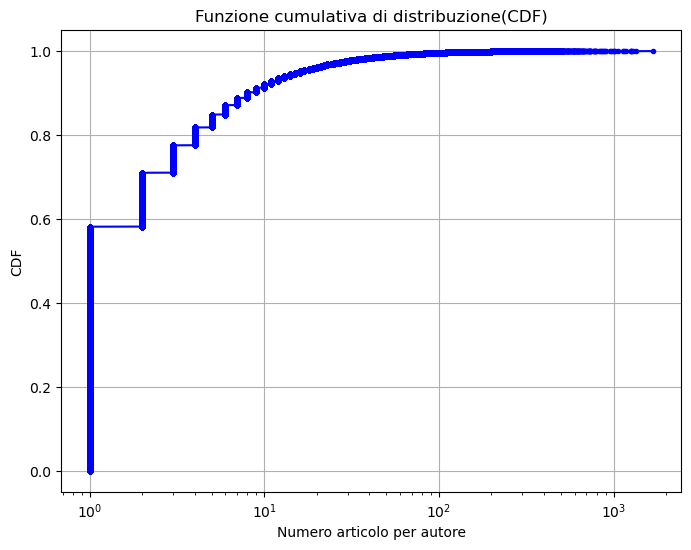

In [92]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_cdf(json_path):
    # Load the input JSON dictionary that contains authors list per article
    with open(json_path, 'r') as file:
        articles_per_author_dict = json.load(file)
    
    # Find the author with the highest number of articles
    author_with_most_articles = max(articles_per_author_dict, key=articles_per_author_dict.get)
    
    # Get the number of articles for the author with the most articles
    num_articles_most = articles_per_author_dict[author_with_most_articles]
    
    # Print the author to be removed and their number of articles
    #print("Author with the highest number of articles (to be removed):", author_with_most_articles)
    #print("Number of articles by this author:", num_articles_most)
    
    # Remove the entry corresponding to the author with the highest number of articles
    #del articles_per_author_dict[author_with_most_articles]
    
    # Convert the dictionary values to a numpy array
    articles_counts = np.array(list(articles_per_author_dict.values()))
    
    # Sort the article counts
    articles_counts_sorted = np.sort(articles_counts)
    
    # Calculate the cumulative distribution function
    cdf = np.arange(1, len(articles_counts_sorted) + 1) / len(articles_counts_sorted)
    
    return articles_counts_sorted, cdf

def plot_cdf(articles_per_author_dict):
    # Calculate the CDF
    articles_counts_sorted, cdf = calculate_cdf(articles_per_author_dict)
    
    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(articles_counts_sorted, cdf, marker='.', linestyle='-', color='b')
    
    # Add labels and title
    plt.xlabel('Numero articolo per autore')
    plt.ylabel('CDF')
    plt.title('Funzione cumulativa di distribuzione(CDF)')
    plt.xscale('log')
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
articles_per_author_dict = '/home/students/mmiot/ArticlesPerAuthors/articles_per_author.json'
plot_cdf(articles_per_author_dict)

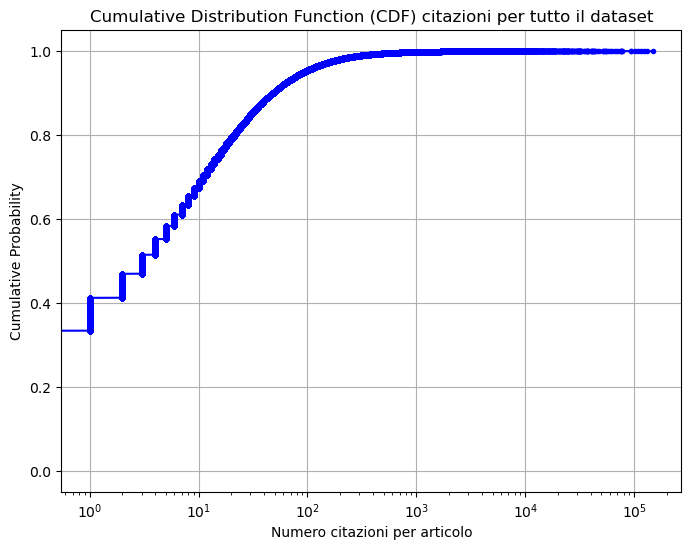

In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_cdf_citations(json_path):
    # Load the input JSON dictionary that contains number of citations per paper
    with open(json_path, 'r') as file:
        citations_per_paper_dict = json.load(file)
    
    # Convert the dictionary values to a numpy array
    citations_counts = np.array(list(citations_per_paper_dict.values()))
    
    # Sort the citation counts
    citations_counts_sorted = np.sort(citations_counts)
    
    # Calculate the cumulative distribution function
    cdf = np.arange(1, len(citations_counts_sorted) + 1) / len(citations_counts_sorted)
    
    return citations_counts_sorted, cdf

def plot_cdf_citations(citations_per_paper_dict):
    # Calculate the CDF for citations
    citations_counts_sorted, cdf = calculate_cdf_citations(json_path)
    
    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(citations_counts_sorted, cdf, marker='.', linestyle='-', color='b')
    
    # Add labels and title
    plt.xlabel('Numero citazioni per articolo')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution Function (CDF) citazioni per tutto il dataset')
    
    plt.xscale('log')
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
json_path = '/home/students/mmiot/CleanedEntireV14Calculations/n_citations_paper.json'
plot_cdf_citations(json_path)

In [3]:
import json

def count_longest_length(data):
    # Initialize total length and total papers count
    total_length = 0
    total_papers_count = 0
    
    # Iterate over each entry in the JSON data
    for entry in data:
        # Get the authors_ids and authors_names lists
        authors_ids = entry.get("v12_authors_id", [])
        authors_names = entry.get("v12_authors_names", [])
        entry_id = entry.get("v12_id", "")
        
        # Check if both authors_ids and authors_names are not empty at the same time
        if authors_ids and authors_names:
            # Count the length of authors_ids excluding empty strings
            ids_length = sum(1 for id in authors_ids if id)
            
            # Count the length of authors_names excluding empty strings
            names_length = sum(1 for name in authors_names if name)
            
            # Add the longest length to the total
            total_length += max(ids_length, names_length)
            
            # Increment total papers count
            if entry_id:
                total_papers_count += 1

    # Check if total_papers_count is zero to avoid division by zero error
    if total_papers_count == 0:
        return 0
    
    return total_length / total_papers_count


import json

def count_longest_length_2(data):
    # Initialize total length and total papers count
    total_length = 0
    total_papers_count = 0
    
    # Iterate over each entry in the JSON data
    for entry in data:
        # Get the authors_ids and authors_names lists
        authors_ids = entry.get("authors_ids", [])
        authors_names = entry.get("authors_names", [])
        entry_id = entry.get("id", "")
        
        # Check if both authors_ids and authors_names are not empty at the same time
        if authors_ids and authors_names:
            # Count the length of authors_ids excluding empty strings
            ids_length = sum(1 for id in authors_ids if id)
            
            # Count the length of authors_names excluding empty strings
            names_length = sum(1 for name in authors_names if name)
            
            # Add the longest length to the total
            total_length += max(ids_length, names_length)
            
            # Increment total papers count
            if entry_id:
                total_papers_count += 1

    # Check if total_papers_count is zero to avoid division by zero error
    if total_papers_count == 0:
        return 0
    
    return total_length / total_papers_count


json_file_path = 'new_map_final.json'  # Replace 'publications.json' with the path to your JSON file
#with open(json_file_path, 'r') as file:
#        loaded_new_map_final = json.load(file)
        
result = count_longest_length(data)
print("\nMean v12 authors per paper:", result)
result_2 = count_longest_length_2(data)
print("\nMean v14 authors per paper:", result_2)


Mean v12 authors per paper: 3.0761285536367278

Mean v14 authors per paper: 3.2684013412235484


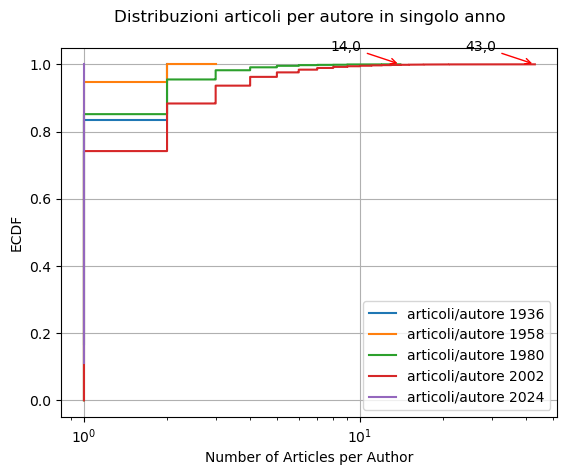

In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute the empirical cumulative distribution function."""
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

def plot_ecdf(*json_files, custom_labels=None):
    """Plot the ECDF of the number of articles per author for each input JSON file."""
    # If custom_labels is not provided, use file names as labels
    if custom_labels is None:
        custom_labels = [json_file for json_file in json_files]
    
    # Iterate over each input JSON file and its corresponding custom label
    for i, (json_file, label) in enumerate(zip(json_files, custom_labels), start=1):
        # Load the JSON file
        with open(json_file, 'r') as file:
            json_data = json.load(file)
        
        # Extract the number of articles per author
        articles_per_author = list(json_data.values())
        
        # Compute the ECDF
        x, y = ecdf(articles_per_author)
        
        # Plot the ECDF with custom label
        plt.step(x, y, label=label)  # Use custom label
        
        # Highlight specific plots and add labels
        if i == 3 or i == 4:  # Highlight json_dict_3 and json_dict_4
            plt.step(x, y, where='post', linestyle='', linewidth=2, color='red', alpha=0.7)
            max_y = np.max(y)
            max_x = x[np.argmax(y)]
            decimal_part = str(max_y).split('.')[1]
            plt.annotate(f'{max_x},{decimal_part}', xy=(max_x, max_y), xytext=(-50, 10),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))
    
    # Set plot labels and legend
    plt.xlabel('Number of Articles per Author')
    plt.ylabel('ECDF')
    plt.legend(loc='lower right')  # Set legend location to lower right
    plt.title('Distribuzioni articoli per autore in singolo anno\n')
    plt.xscale('log')
    # Show the plot
    plt.grid(True)
    plt.show()
    
# Example usage:
json_dict_1 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU_36.json'
json_dict_2 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU_58.json'
json_dict_3 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU_80.json'
json_dict_4 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU_02.json'
json_dict_5 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU_24.json'

# Example usage with custom labels:
plot_ecdf(json_dict_1, json_dict_2, json_dict_3, json_dict_4, json_dict_5,
           custom_labels=['articoli/autore 1936', 'articoli/autore 1958', 'articoli/autore 1980', 'articoli/autore 2002', 'articoli/autore 2024'])


In [16]:
import json

def filter_papers_by_year(data, output_file):
    output_list = []
    for entry in data:  # Each `entry` is a dictionary
        year = entry["year"]
        if year and 1980 <= year <= 2000:
            output_list.append(entry)

    with open(output_file, 'w') as f:
        json.dump(output_list, f, indent=2)

# Example usage
input_file = '/home/students/mmiot/Last Files/articles_500authors80to24.json'
output_file = '/home/students/mmiot/Last Files/articles_500authors80to00.json'
with open(input_file, 'r') as f:
    data = json.load(f)
filter_papers_by_year(data, output_file)

In [25]:
import json
#function to count how many authors from 1980 to 2024 with 50 or more publications
def authors_with_50_or_more_publications(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    authors_with_50_or_more = 0
    for author_id, publications_count in data.items():
        if publications_count >= 500:
            authors_with_50_or_more += 1
    
    return authors_with_50_or_more

# Example usage:  
json_file_path = '/home/students/mmiot/ArticlesPerAuthors/ARperAU1980to2024.json' 
result = authors_with_50_or_more_publications(json_file_path)
print("Number of authors with 50 or more publications:", result)

Number of authors with 50 or more publications: 143


In [26]:
import json
#function to store authors from 1980 to 2024 with 50 or more publications
def authors_with_50_or_more_publications(json_file_path, output_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    authors_with_50_or_more = []
    for author_id, publications_count in data.items():
        if publications_count >= 500:
            authors_with_50_or_more.append(author_id)
    
    with open(output_file_path, 'w') as outfile:
        json.dump(authors_with_50_or_more, outfile, indent=4)

# Example usage:
json_file_path = '/home/students/mmiot/ArticlesPerAuthors/ARperAU1980to2024.json'  
output_file_path = '/home/students/mmiot/Last Files/authors_with_≥500_publications_until2024.json' 
authors_with_50_or_more_publications(json_file_path, output_file_path)

In [ ]:
#///////////media e sd pubblicazioni per autori >=50 fino a 2024

In [49]:
import json
import math

def time_series_calculation(dataset, author_ids, temporal_scenario):

    # Initialize an empty dictionary to store the number of publications per year for each author
    publications_per_author_per_year = {author_id: {} for author_id in author_ids}

    # Iterate through the dataset and collect the number of publications for each author
    for entry in dataset:
        if entry["year"] in temporal_scenario:
            for author_id in entry["authors_ids"]:
                if author_id in author_ids:
                    year = entry["year"]
                    if year not in publications_per_author_per_year[author_id]:
                        publications_per_author_per_year[author_id][year] = 0
                    publications_per_author_per_year[author_id][year] += 1

    # Aggregate the data points for each year across all authors
    total_publications_per_year = {}
    for author_id, publications_per_year in publications_per_author_per_year.items():
        for year, publications in publications_per_year.items():
            if year not in total_publications_per_year:
                total_publications_per_year[year] = 0
            total_publications_per_year[year] += publications

    # Convert the dictionary to a list of data points (time series)
    time_series = [total_publications_per_year.get(year, 0) for year in temporal_scenario]
    #print("Calculated time_series")
    
    # Calculate the mean of the time series
    mean_value = sum(time_series) / len(time_series)
    #print("Calculated mean_value")
    
    #standard deviation 
    squared_diff_sum = sum((x - mean_value) ** 2 for x in time_series)
    sd_value = math.sqrt(squared_diff_sum / len(time_series))
    #print("Calculated sd_value")

    return mean_value, sd_value

# Function usage
file_1 = '/home/students/mmiot/new_map_final.json'
file_2 = '/home/students/mmiot/New Files/authors_with_≥50_publications_until2024.json'

#try:
    # Load the set of authors
    #with open(file_1, 'r') as f:
        #dataset = json.load(f)
        #print("Loaded input_file_1.")
            
    # Load the dataset
    #with open(file_2, 'r') as f:
        #author_ids = json.load(f)
        #print("Loaded input_file_2.")
            
#except FileNotFoundError:
    #print("Error: One or both input files not found.")
    
#except json.JSONDecodeError:
    #print("Error: JSON decoding failed. Please check the format of the input files.")

# Temporal scenarios declaration
T1 = list(range(1980, 1991))  
T2 = list(range(1991, 2001))  
T3 = list(range(2001, 2003))  
T4 = list(range(2003, 2005))
T5 = list(range(2005, 2007))
T6 = list(range(2007, 2009))
T7 = list(range(2009, 2011))
T8 = list(range(2011, 2013))
T9 = list(range(2013, 2015))
T10 = list(range(2015, 2017))
T11 = list(range(2017, 2019))
T12 = list(range(2019, 2021))
T13 = list(range(2021, 2023))
T14 = list(range(2023, 2025))

result = time_series_calculation(dataset, author_ids, T14)
if result is not None:
    print("Mean, SD total author's publication per year from 1980 to 1990:\n", result)

Mean, SD total author's publication per year from 1980 to 1990:
 (424.5, 421.5)


In [51]:
# When comparing mean values between consecutive time periods, a sharp and unexpected rise indicates 
# abrupt growth.
# If the standard deviation decreases along with an abrupt increase in the mean, it suggests that the data 
# points become more concentrated around the higher mean value, indicating a more uniform and consistent 
# growth pattern.
# Conversely, if the standard deviation increases along with an abrupt increase in the mean, it suggests 
# that the data points become more dispersed or variable around the higher mean value, indicating a less 
# uniform and more erratic growth pattern.

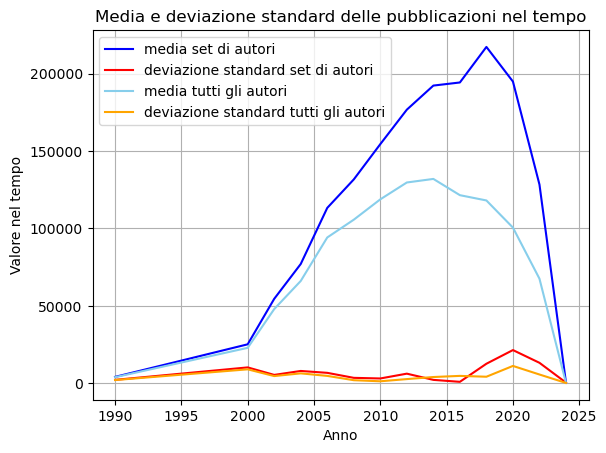

In [7]:
import matplotlib.pyplot as plt

mean_values_24 = [4119.909090909091, 25159.6, 54541.5, 77039.0, 113271.0, 131649.5, 154453.0, 176705.5, 192259.5, 194264.0, 217226.0, 194864.0, 128353.0, 424.5]

std_dev_values_24 = [2200.194886183968, 10241.008106627003, 5400.5, 7952.0, 6731.0, 3501.5, 3097.0, 6205.5, 2188.5, 930.0, 12613.0, 21436.0, 13214.0, 421.5]


mean_values = [3916.3636363636365, 22878.4, 47921.0, 66078.0, 94167.0, 105646.5, 118786.0, 129676.0, 131974.5, 121479.5, 118062.0, 100531.5, 67537.5, 224.5]

std_dev_values = [2078.0950749414396, 9003.620285196394, 4649.0, 6395.0, 4760.0, 1977.5, 1279.0, 2697.0, 4031.5, 4766.5, 4221.0, 11197.5, 5658.5, 222.5]

years = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Plot the mean values
plt.plot(years, mean_values_24, marker='', linestyle='-', color='blue', label='media set di autori')

# Plot the standard deviation values
plt.plot(years, std_dev_values_24, marker='', linestyle='-', color='red', label='deviazione standard set di autori')

# Plot the mean values
plt.plot(years, mean_values, marker='', linestyle='-', color='skyblue', label='media tutti gli autori')

# Plot the standard deviation values
plt.plot(years, std_dev_values, marker='', linestyle='-', color='orange', label='deviazione standard tutti gli autori')


# Add labels and title
plt.xlabel('Anno')
plt.ylabel('Valore nel tempo')
plt.title('Media e deviazione standard delle pubblicazioni nel tempo')
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines
plt.show()

In [ ]:
#////////////normalizzazione media e sd autori >=50pubblicazioni fino a 2024

In [26]:
import json
import math

def time_series_calculation(dataset, author_ids, temporal_scenario):

    # Initialize an empty dictionary to store the number of publications per year for each author
    publications_per_author_per_year = {author_id: {} for author_id in author_ids}
    
    author_ids_set = set()

    # Iterate through the dataset and collect the number of publications for each author
    for entry in dataset:
        if entry["year"] in temporal_scenario:
            for author_id in entry["authors_ids"]:
                if author_id in author_ids:
                    # Update the set with the author ID that meets the condition
                    author_ids_set.add(author_id)
                    year = entry["year"]
                    if year not in publications_per_author_per_year[author_id]:
                        publications_per_author_per_year[author_id][year] = 0
                    publications_per_author_per_year[author_id][year] += 1

    # Aggregate the data points for each year across all authors
    total_publications_per_year = {}
    for author_id, publications_per_year in publications_per_author_per_year.items():
        for year, publications in publications_per_year.items():
            if year not in total_publications_per_year:
                total_publications_per_year[year] = 0
            total_publications_per_year[year] += publications

    # Convert the dictionary to a list of data points (time series)
    time_series = [total_publications_per_year.get(year, 0) for year in temporal_scenario]
    #print("Calculated time_series")
    
    # Calculate the mean of the time series
    mean_value = sum(time_series) / len(time_series)
    #print("Calculated mean_value")
    
    # Calculate the standard deviation
    squared_diff_sum = sum((x - mean_value) ** 2 for x in time_series)
    sd_value = math.sqrt(squared_diff_sum / len(time_series))
    #print("Calculated sd_value")
    
    # Normalize the mean value on the number of authors
    # for each time sections it divide the mean of publication calculated on it divided by
    # the number of authors that published in that time section, saved in count
    num_authors = len(author_ids_set)  # Use the length of the set
    mean_value_per_author = mean_value / num_authors
    
    sd_value_per_author = sd_value / num_authors

    return mean_value_per_author, sd_value_per_author

# Function usage
file_1 = '/home/students/mmiot/new_map_final.json'
file_2 = '/home/students/mmiot/authors_with_≥50_publications_until2024.json'

#try:
    # Load the set of authors
    #with open(file_1, 'r') as f:
        #dataset = json.load(f)
        #print("Loaded input_file_1.")
            
    # Load the dataset
    #with open(file_2, 'r') as f:
        #author_ids = json.load(f)
        #print("Loaded input_file_2.")
            
#except FileNotFoundError:
    #print("Error: One or both input files not found.")
    
#except json.JSONDecodeError:
    #print("Error: JSON decoding failed. Please check the format of the input files.")

# Temporal scenarios declaration
T1 = list(range(1980, 1991))  
T2 = list(range(1991, 2001))  
T3 = list(range(2001, 2003))  
T4 = list(range(2003, 2005))
T5 = list(range(2005, 2007))
T6 = list(range(2007, 2009))
T7 = list(range(2009, 2011))
T8 = list(range(2011, 2013))
T9 = list(range(2013, 2015))
T10 = list(range(2015, 2017))
T11 = list(range(2017, 2019))
T12 = list(range(2019, 2021))
T13 = list(range(2021, 2023))
T14 = list(range(2023, 2025))

result = time_series_calculation(dataset, author_ids, T14)
if result is not None:
    print("Mean, SD total author's publication per year from 1980 to 1990:\n", result)

Mean, SD total author's publication per year from 1980 to 1990:
 (0.5570866141732284, 0.5531496062992126)


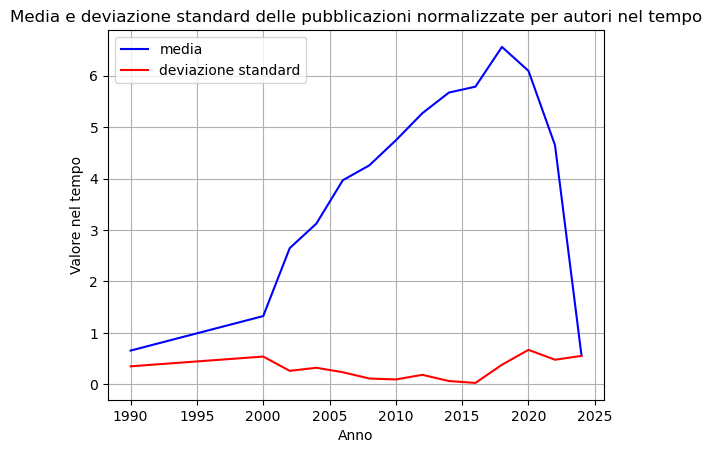

In [147]:
import matplotlib.pyplot as plt

mean_values_24 = [0.6563500224484772, 1.3270531146157496, 2.6489315201554153, 3.122527561608301, 3.967321634969003, 4.2567820997833605, 4.743642506142506, 5.270543144331435, 5.672040948784518, 5.786316385190481, 6.5591521227127245, 6.093879976232917, 4.649628690454628, 0.5570866141732284]

std_dev_values_24 = [0.35051694857160554, 0.5401660481368745, 0.2622875182127246, 0.3223086900129702, 0.23575356379811566, 0.11321822355870276, 0.09511670761670761, 0.18508962925403405, 0.06456514042954921, 0.027700831024930747, 0.38085029289208283, 0.6703568189636301, 0.4786813982974099, 0.5531496062992126]


mean_values = [0.7048890634203809, 1.5741296270813268, 3.091278544703909, 3.8113860529503376, 5.092861005949162, 5.613522848034006, 6.309007860633099, 6.916791124386601, 7.141090850062226, 6.7601279910962715, 6.77388260944403, 6.091710598073077, 4.8424392342439235, 0.577120822622108]

std_dev_values = [0.374027191314154, 0.6194867404153291, 0.29989678751128884, 0.36886427871027283, 0.2574364521362899, 0.10507438894792774, 0.06793074144890589, 0.14385534457008747, 0.21814295763216277, 0.2652476349471341, 0.24218256928108325, 0.6785129976367933, 0.40571449057144904, 0.5719794344473008]

years = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Mean values for each temporal segment
#mean_values = [3123.67, 14576.0, 54619.2, 119733.9]

# Standard deviation values for each temporal segment
#std_dev_values = [1263.899, 6617.726, 23903.836, 11956.349]

# Define the years (start years of each segment) for the x-axis
#years = list(range(1980, 2016, 12)) + [2015] # Years for each segment (1980, 1988, 1996, 2004)
#years = [1988, 1997, 2006, 2015]

# Plot the mean values
plt.plot(years, mean_values_24, marker='', linestyle='-', color='blue', label='media')

# Plot the standard deviation values
plt.plot(years, std_dev_values_24, marker='', linestyle='-', color='red', label='deviazione standard')

# Add labels and title
plt.xlabel('Anno')
plt.ylabel('Valore nel tempo')
plt.title('Media e deviazione standard delle pubblicazioni normalizzate per autori nel tempo')
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines
plt.show()

In [79]:
#//////////////new RAGS with fixed positive and negative growth and until 2024

In [27]:
import json

def articles_accumulated_per_year(papers, author_ids):
    # Determine the minimum and maximum years in the dataset
    min_year = 1980
    max_year = max(paper["year"] for paper in papers)
    
    # Calculate the range of years and the corresponding index range
    year_range = max_year - min_year + 1
    index_range = year_range  # Since we're calculating differences
    
    # Initialize a dictionary to store the accumulated articles for each author per year
    accumulated_articles_per_author = {author_id: [0] * index_range for author_id in author_ids}

    # Iterate through each paper
    for paper in papers:
        year = paper["year"]
        authors = paper["authors_ids"]
        
        # Check if the paper's year is within the dataset's range
        if min_year <= year <= max_year:
            for author_id in authors:
                if author_id in author_ids:
                    # Calculate the index for the current year
                    index = year - min_year
                    # Check if the index is within the valid range
                    if 0 <= index < index_range:
                        # Increment the accumulated articles for the author in the corresponding year
                        accumulated_articles_per_author[author_id][index] += 1 

    # Calculate growth between consecutive years for each author
    for author_id, publications_per_year in accumulated_articles_per_author.items():
        for i in range(1, index_range):
            # Calculate the growth between consecutive years
            growth = publications_per_year[i] - publications_per_year[i - 1]
            # Update the publication count with the growth value
            accumulated_articles_per_author[author_id][i] = growth

    return accumulated_articles_per_author


# Example usage:

# Load the list of papers
with open("/home/students/mmiot/new_map_final.json", "r") as f:
    papers = json.load(f)

# Load the list of author IDs
with open("/home/students/mmiot/Last Files/authors_with_≥500_publications_until2024.json", "r") as f:
    author_ids = json.load(f)

# Calculate the accumulated articles for each author per year
accumulated_articles_per_author = articles_accumulated_per_year(papers, author_ids)

# Save the dictionary to a new JSON file
output_json_path = "/home/students/mmiot/Last Files/articles_accumulated_per_year_500_authors.json"
with open(output_json_path, "w") as output_file:
    json.dump(accumulated_articles_per_author, output_file)

print("Accumulated articles per year saved to:", output_json_path)

Accumulated articles per year saved to: /home/students/mmiot/Last Files/articles_accumulated_per_year_500_authors.json


In [35]:
import json
import statistics
# Calculate mean RAGS from 80 to 2024
# for each researcher (with 50 and more publications from 80 to 2024)
# and save the result in a json output file

def calculate_rags_mean(articles_growth_speeds):
    # Calculate mean RAGS for each researcher
     #rags_means = {}
     #for researcher, rags in articles_growth_speeds.items():
         #rags_mean = sum(rags) / len(rags)
         #rags_means[researcher] = rags_mean
     #return rags_means

    # Calculate standard deviation of RAGS for each researcher
    rags_stds = {}
    for researcher, rags in articles_growth_speeds.items():
        rags_std = statistics.stdev(rags)
        rags_stds[researcher] = rags_std
    return rags_stds

def researchers_with_high_rags(articles_growth_speeds):
    # Calculate mean RAGS for each researcher
    rags_means = calculate_rags_mean(articles_growth_speeds)
    
    return rags_means

# Example usage:
# Load the articles_growth_speeds from a file
with open("/home/students/mmiot/Last Files/articles_accumulated_per_year_500_authors.json", "r") as f:
    articles_growth_speeds = json.load(f)

# Get researchers with mean RAGS for all researchers
researchers_rags = researchers_with_high_rags(articles_growth_speeds)

# Save the dictionary to a new JSON file
output_json_path = "/home/students/mmiot/Last Files/sd_rags_500_authors.json"
with open(output_json_path, "w") as output_file:
    json.dump(researchers_rags, output_file)

print("Researchers with mean RAGS saved to:", output_json_path)

Researchers with mean RAGS saved to: /home/students/mmiot/Last Files/sd_rags_500_authors.json


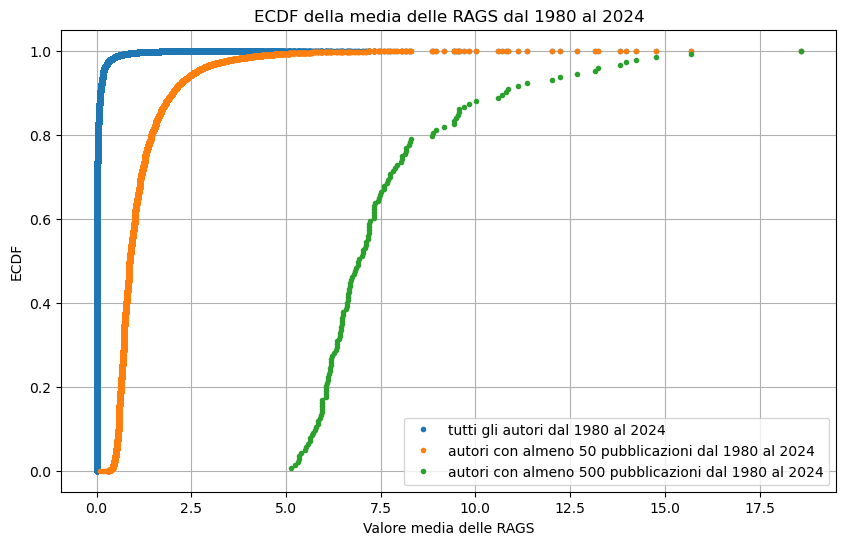

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import json

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for the ECDF
    y = np.arange(1, n + 1) / n
    
    return x, y

def plot_ecdf(mean_rags_dicts):
    """Plot ECDF for the mean RAGS values."""
    plt.figure(figsize=(10, 6))
    
    for mean_rags_dict, label in zip(mean_rags_dicts, custom_labels):
        # Extract mean RAGS values from the dictionary
        with open(mean_rags_dict, "r") as f:
            articles_growth_speeds = json.load(f)
        mean_rags_values = list(articles_growth_speeds.values())
        
        # Compute ECDF
        x, y = ecdf(mean_rags_values)
        
        # Plot ECDF
        plt.plot(x, y, marker='.', linestyle='none', label=label)
        #plt.plot(x, y, marker='.', linestyle='-', color='orange', label='Mean rags all authors')
    
    plt.xlabel('Valore media delle RAGS')
    plt.ylabel('ECDF')
    plt.title('ECDF della media delle RAGS dal 1980 al 2024')
    plt.grid(True)
    plt.legend()
    #plt.xscale('log')
    plt.show()

# Example usage:
mean_rags_dicts = [
    '/home/students/mmiot/New Files/researchers_mean_rags_all.json',
    '/home/students/mmiot/New Files/researchers_mean_rags_50_authors.json',
    '/home/students/mmiot/Last Files/mean_rags_500_authors.json'
]
custom_labels = ["tutti gli autori dal 1980 al 2024", "autori con almeno 50 pubblicazioni dal 1980 al 2024", "autori con almeno 500 pubblicazioni dal 1980 al 2024"]
plot_ecdf(mean_rags_dicts)

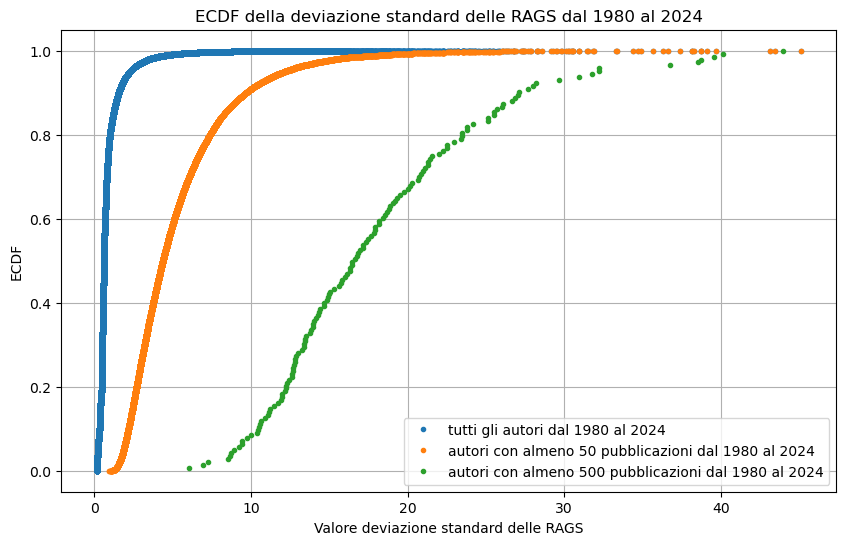

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for the ECDF
    y = np.arange(1, n + 1) / n
    
    return x, y

def plot_ecdf(mean_rags_dicts, custom_labels):
    """Plot ECDF for the mean RAGS values."""
    plt.figure(figsize=(10, 6))
    
    for mean_rags_dict, label in zip(mean_rags_dicts, custom_labels):
        # Extract mean RAGS values from the dictionary
        with open(mean_rags_dict, "r") as f:
            articles_growth_speeds = json.load(f)
        mean_rags_values = list(articles_growth_speeds.values())
        
        # Compute ECDF
        x, y = ecdf(mean_rags_values)
        
        # Plot ECDF with custom label
        plt.plot(x, y, marker='.', linestyle='none', label=label)
    
    plt.xlabel('Valore deviazione standard delle RAGS')
    plt.ylabel('ECDF')
    plt.title('ECDF della deviazione standard delle RAGS dal 1980 al 2024')
    plt.grid(True)
    plt.legend()
    #plt.xscale('log')
    plt.show()

# Example usage:
mean_rags_dicts = [
    '/home/students/mmiot/New Files/researchers_sd_rags_all.json',
    '/home/students/mmiot/New Files/researchers_sd_rags_50_authors.json',
    '/home/students/mmiot/Last Files/sd_rags_500_authors.json'
]

custom_labels = ["tutti gli autori dal 1980 al 2024", "autori con almeno 50 pubblicazioni dal 1980 al 2024", "autori con almeno 500 pubblicazioni dal 1980 al 2024"]

plot_ecdf(mean_rags_dicts, custom_labels)

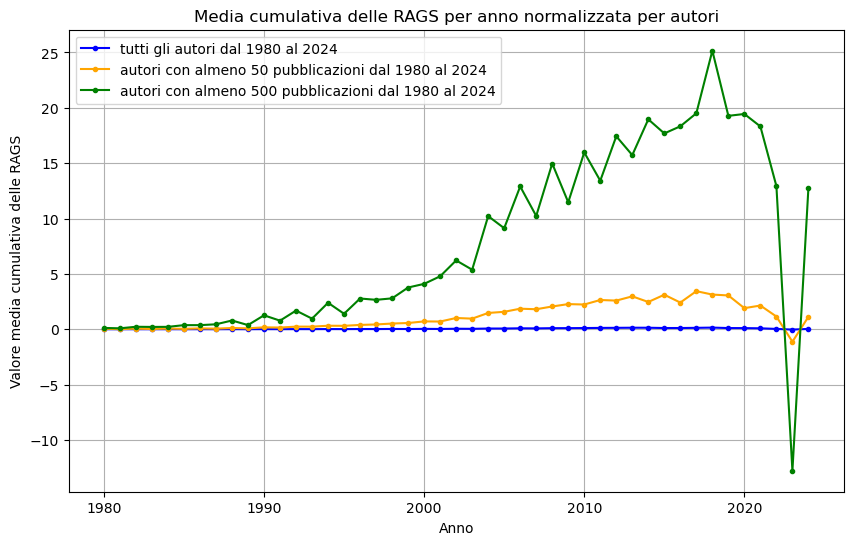

In [39]:
import json
import matplotlib.pyplot as plt
def calculate_mean_cumulative_rags(json_file_path):
    # Load the JSON file
    with open(json_file_path, "r") as f:
        data = json.load(f)
    
    # Initialize a dictionary to store cumulative RAGS values for each year
    cumulative_rags = {}
    # Initialize a dictionary to store the number of authors contributing to RAGS for each year
    num_authors = {}
    
    # Iterate over each author's RAGS values
    for author_id, rags_values in data.items():
        # Iterate over each year and update cumulative RAGS values
        for year, rags in enumerate(rags_values, start=1980):
            cumulative_rags.setdefault(year, 0)
            cumulative_rags[year] += rags
            num_authors.setdefault(year, 0)
            num_authors[year] += 1
    
    # Calculate mean cumulative RAGS for each year
    mean_cumulative_rags = {}
    for year in cumulative_rags:
        mean_cumulative_rags[year] = cumulative_rags[year] / num_authors[year]
    
    return mean_cumulative_rags

def plot_mean_cumulative_rags(cumulative_rags, cumulative_rags_2, cumulative_rags_3):
    # Extract years and RAGS values
    years = list(cumulative_rags.keys())
    rags_values = list(cumulative_rags.values())
    years_2 = list(cumulative_rags_2.keys())
    rags_values_2 = list(cumulative_rags_2.values())
    years_3 = list(cumulative_rags_3.keys())
    rags_values_3 = list(cumulative_rags_3.values())
    
    # Plot the RAGS graph
    plt.figure(figsize=(10, 6))
    plt.plot(years, rags_values, marker='.', linestyle='-', label='tutti gli autori dal 1980 al 2024', color='blue')
    plt.plot(years_2, rags_values_2, marker='.', linestyle='-', label='autori con almeno 50 pubblicazioni dal 1980 al 2024', color='orange')
    plt.plot(years_3, rags_values_3, marker='.', linestyle='-', label='autori con almeno 500 pubblicazioni dal 1980 al 2024', color='green')

    plt.title('Media cumulativa delle RAGS per anno normalizzata per autori')
    plt.xlabel('Anno')
    plt.ylabel('Valore media cumulativa delle RAGS')
    plt.grid(True)
    plt.legend()  # Add legend to the plot
    plt.show()

# Example usage:
json_file_path = '/home/students/mmiot/New Files/articles_accumulated_per_year_all_authors.json'
json_file_path_2 = '/home/students/mmiot/New Files/articles_accumulated_per_year_50_authors.json'
json_file_path_3 = '/home/students/mmiot/Last Files/articles_accumulated_per_year_500_authors.json'
cumulative_rags = calculate_mean_cumulative_rags(json_file_path)
cumulative_rags_2 = calculate_mean_cumulative_rags(json_file_path_2)
cumulative_rags_3 = calculate_mean_cumulative_rags(json_file_path_3)
plot_mean_cumulative_rags(cumulative_rags, cumulative_rags_2, cumulative_rags_3)

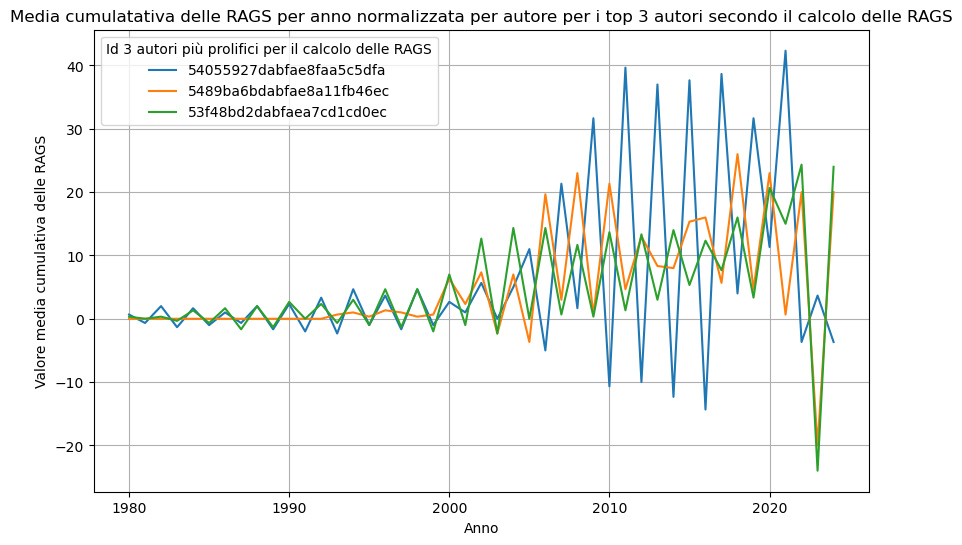

In [21]:
import json
import matplotlib.pyplot as plt

def calculate_cumulative_rags(json_file_path):
    # Define the specific author entries
    specific_author_entries_2 = ['54055927dabfae8faa5c5dfa', '5489ba6bdabfae8a11fb46ec', '53f48bd2dabfaea7cd1cd0ec']
    
    # Load the JSON file
    with open(json_file_path, "r") as f:
        data = json.load(f)
    
    # Initialize dictionaries to store cumulative RAGS values and number of authors for each year
    cumulative_rags = {author_id: {} for author_id in specific_author_entries_2}
    num_authors_per_year = {}

    # Iterate over specific author entries
    for author_id in specific_author_entries_2:
        # Check if the author ID exists in the data
        if author_id in data:
            rags_values = data[author_id]
            # Iterate over each year and update cumulative RAGS values and author count for the current author
            for year, rags in enumerate(rags_values, start=1980):
                if year not in num_authors_per_year:
                    num_authors_per_year[year] = 0
                num_authors_per_year[year] += 1
                cumulative_rags[author_id][year] = rags
    
    # Normalize each author's RAGS values by the number of authors for each year
    normalized_rags = {author_id: {} for author_id in specific_author_entries_2}
    for author_id in cumulative_rags:
        for year in cumulative_rags[author_id]:
            normalized_rags[author_id][year] = cumulative_rags[author_id][year] / 3

    return normalized_rags

def plot_cumulative_rags(normalized_rags):
    # Plot the normalized RAGS graph for each author
    plt.figure(figsize=(10, 6))
    for author_id, rags_data in normalized_rags.items():
        years = list(rags_data.keys())
        rags_values = list(rags_data.values())
        plt.plot(years, rags_values, marker='none', linestyle='-', label=author_id)
    
    plt.title('Media cumulatativa delle RAGS per anno normalizzata per autore per i top 3 autori secondo il calcolo delle RAGS')
    plt.xlabel('Anno')
    plt.ylabel('Valore media cumulativa delle RAGS')
    plt.grid(True)
    plt.legend(title="Id 3 autori più prolifici per il calcolo delle RAGS")
    plt.show()

# Example usage:
json_file_path = '/home/students/mmiot/New Files/articles_accumulated_per_year_all_authors.json'
normalized_rags = calculate_cumulative_rags(json_file_path)
plot_cumulative_rags(normalized_rags)

In [12]:
#////calculations on citations

In [ ]:
#/////Distribuzione citazioni da 2000 a 2024

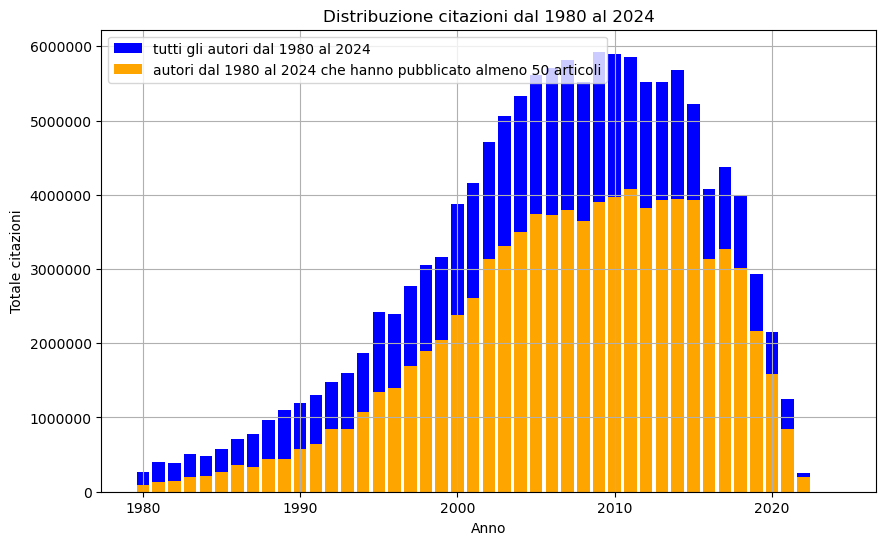

In [47]:
import json
import matplotlib.pyplot as plt

def calculate_citation_distribution(json_data):
    citation_distribution = {}

    # Initialize citation distribution for years 1980 to 2024
    for year in range(1980, 2025):
        citation_distribution[year] = 0

    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        # Check if the entry's year is within the range 1980 to 2024
        if 1980 <= entry.get("year", 0) <= 2024:
            # Increment the citation count for the corresponding year
            citation_distribution[entry["year"]] += entry.get("n_citation", 0)
    
    return citation_distribution

# Example usage:
json_file_path_1 = '/home/students/mmiot/new_map_final.json'
json_file_path_2 = '/home/students/mmiot/articles_50authors80to24.json'

#with open(json_file_path_1, "r") as f:
    #dataset_1 = json.load(f)
#with open(json_file_path_2, "r") as f:
    #dataset_2 = json.load(f)

citation_distribution_1 = calculate_citation_distribution(dataset_1)
citation_distribution_2 = calculate_citation_distribution(dataset_2)

# Plotting the citation distributions together
plt.figure(figsize=(10, 6))

# Plot bars for the higher data (all authors)
plt.bar(citation_distribution_1.keys(), citation_distribution_1.values(), color='blue', label='tutti gli autori dal 1980 al 2024')

# Plot bars for the lower data (authors with at least 50 publications)
plt.bar(citation_distribution_2.keys(), citation_distribution_2.values(), color='orange', label='autori dal 1980 al 2024 che hanno pubblicato almeno 50 articoli')

plt.xlabel('Anno')
plt.ylabel('Totale citazioni')
plt.title('Distribuzione citazioni dal 1980 al 2024')
plt.legend()
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

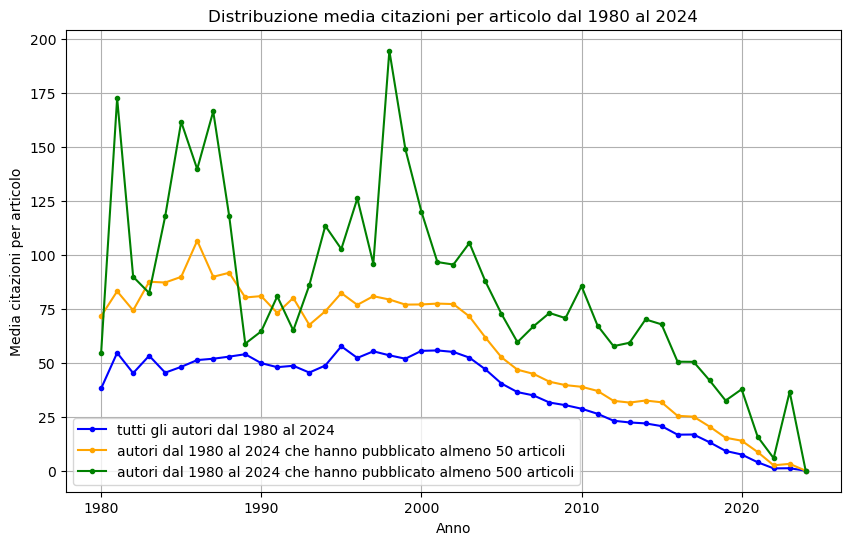

In [43]:
import json
import matplotlib.pyplot as plt

def calculate_average_citation_distribution(json_data):
    citation_distribution = {}
    article_count = {}

    # Initialize citation distribution and article count for years 1980 to 2024
    for year in range(1980, 2025):
        citation_distribution[year] = 0
        article_count[year] = 0

    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        # Check if the entry's year is within the range 1980 to 2024
        year = entry.get("year", 0)
        if 1980 <= year <= 2024:
            # Increment the citation count and article count for the corresponding year
            citation_distribution[year] += entry.get("n_citation", 0)
            article_count[year] += 1

    # Calculate average citations per article for each year
    average_citation_distribution = {}
    for year in range(1980, 2025):
        if article_count[year] > 0:
            average_citation_distribution[year] = citation_distribution[year] / article_count[year]
        else:
            average_citation_distribution[year] = 0

    return average_citation_distribution

# Example usage:
json_file_path_1 = '/home/students/mmiot/new_map_final.json'
json_file_path_2 = '/home/students/mmiot/articles_50authors80to24.json'
json_file_path_3 = '/home/students/mmiot/Last Files/articles_500authors80to24.json'

with open(json_file_path_1, "r") as f:
    dataset_1 = json.load(f)
with open(json_file_path_2, "r") as f:
    dataset_2 = json.load(f)
with open(json_file_path_3, "r") as f:
    dataset_3 = json.load(f)

average_citation_distribution_1 = calculate_average_citation_distribution(dataset_1)
average_citation_distribution_2 = calculate_average_citation_distribution(dataset_2)
average_citation_distribution_3 = calculate_average_citation_distribution(dataset_3)

# Plotting the average citation distributions together
plt.figure(figsize=(10, 6))

# Plot lines for the higher data (all authors)
plt.plot(average_citation_distribution_1.keys(), average_citation_distribution_1.values(), color='blue', label='tutti gli autori dal 1980 al 2024', marker='.')

# Plot lines for the lower data (authors with at least 50 publications)
plt.plot(average_citation_distribution_2.keys(), average_citation_distribution_2.values(), color='orange', label='autori dal 1980 al 2024 che hanno pubblicato almeno 50 articoli', marker='.')

# Plot lines for the lower data (authors with at least 50 publications)
plt.plot(average_citation_distribution_3.keys(), average_citation_distribution_3.values(), color='green', label='autori dal 1980 al 2024 che hanno pubblicato almeno 500 articoli', marker='.')

plt.xlabel('Anno')
plt.ylabel('Media citazioni per articolo')
plt.title('Distribuzione media citazioni per articolo dal 1980 al 2024')
plt.legend()
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

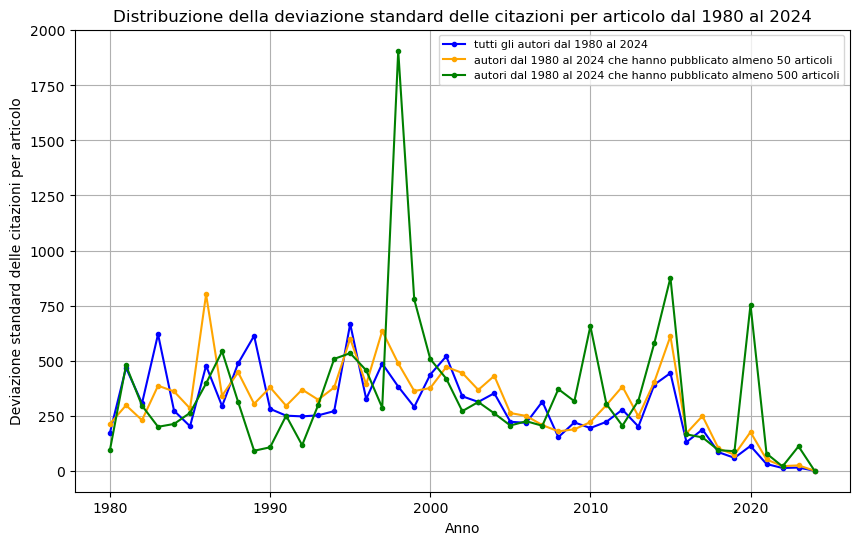

In [44]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_citation_std_dev_distribution(json_data):
    citation_distribution = {}
    article_count = {}
    citations_per_year = {}

    # Initialize citation distribution, article count, and citations per year for years 1980 to 2024
    for year in range(1980, 2025):
        citation_distribution[year] = 0
        article_count[year] = 0
        citations_per_year[year] = []

    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        # Check if the entry's year is within the range 1980 to 2024
        year = entry.get("year", 0)
        if 1980 <= year <= 2024:
            # Append the citation count to the list for the corresponding year
            citations_per_year[year].append(entry.get("n_citation", 0))
            article_count[year] += 1

    # Calculate standard deviation of citations per article for each year
    citation_std_dev_distribution = {}
    for year in range(1980, 2025):
        if article_count[year] > 0:
            citation_std_dev_distribution[year] = np.std(citations_per_year[year])
        else:
            citation_std_dev_distribution[year] = 0

    return citation_std_dev_distribution

# Example usage:
json_file_path_1 = '/home/students/mmiot/new_map_final.json'
json_file_path_2 = '/home/students/mmiot/articles_50authors80to24.json'
json_file_path_3 = '/home/students/mmiot/Last Files/articles_500authors80to24.json'

#with open(json_file_path_1, "r") as f:
    #dataset_1 = json.load(f)
#with open(json_file_path_2, "r") as f:
    #dataset_2 = json.load(f)
#with open(json_file_path_3, "r") as f:
    #dataset_3 = json.load(f)

citation_std_dev_distribution_1 = calculate_citation_std_dev_distribution(dataset_1)
citation_std_dev_distribution_2 = calculate_citation_std_dev_distribution(dataset_2)
citation_std_dev_distribution_3 = calculate_citation_std_dev_distribution(dataset_3)

# Plotting the citation standard deviation distributions together
plt.figure(figsize=(10, 6))

# Plot lines for the higher data (all authors)
plt.plot(citation_std_dev_distribution_1.keys(), citation_std_dev_distribution_1.values(), color='blue', label='tutti gli autori dal 1980 al 2024',  marker='.')

# Plot lines for the lower data (authors with at least 50 publications)
plt.plot(citation_std_dev_distribution_2.keys(), citation_std_dev_distribution_2.values(), color='orange', label='autori dal 1980 al 2024 che hanno pubblicato almeno 50 articoli',  marker='.')

# Plot lines for the lower data (authors with at least 500 publications)
plt.plot(citation_std_dev_distribution_3.keys(), citation_std_dev_distribution_3.values(), color='green', label='autori dal 1980 al 2024 che hanno pubblicato almeno 500 articoli',  marker='.')

plt.xlabel('Anno')
plt.ylabel('Deviazione standard delle citazioni per articolo')
plt.title('Distribuzione della deviazione standard delle citazioni per articolo dal 1980 al 2024')
plt.legend(loc='upper right', fontsize="8")
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

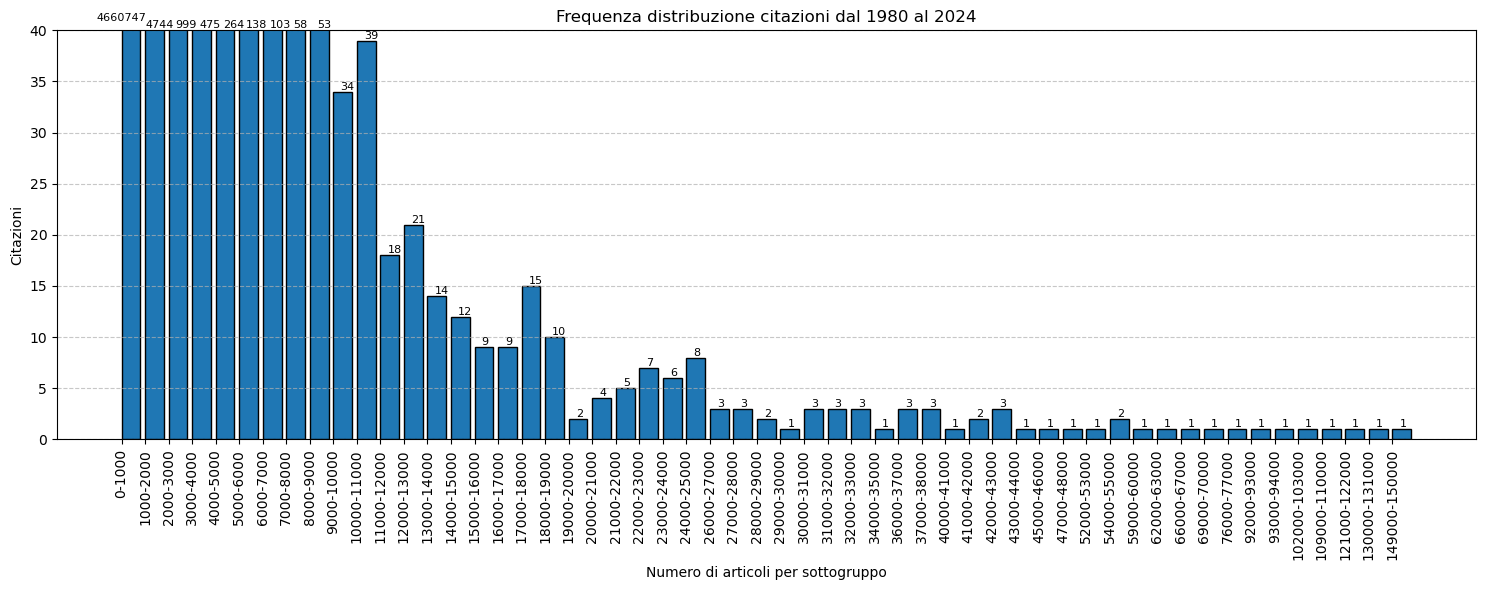

In [18]:
import matplotlib.pyplot as plt

def plot_citation_distribution(citation_bins):
    # Extract bin ranges and counts
    bins = [bin_range[0] for bin_range in citation_bins.keys()]
    counts = [count for count in citation_bins.values()]

    # Define the bin width and number of bins
    bin_width = 1000
    num_bins = len(bins)

    # Generate bin labels exactly as they are in the input
    bin_labels = [f"{bin_range[0]}-{bin_range[1]}" for bin_range in citation_bins.keys()]

    # Plot the distribution
    plt.figure(figsize=(15, 6))
    bars = plt.bar(range(num_bins), counts, align='edge', edgecolor='black')
    plt.title('Frequenza distribuzione citazioni dal 1980 al 2024')
    plt.ylim(0, 40)  # Set y-axis limits
    plt.xlabel('Numero di articoli per sottogruppo')
    plt.ylabel('Citazioni')
    plt.xticks(range(num_bins), bin_labels, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))  # Set y-axis labels to exponential notation
    
    # Add total citation count on top of each bin within y-axis limit
    for i, (bin_range, count) in enumerate(citation_bins.items()):
        x = i
        y = min(count, 40)  # Adjusting the limit to the maximum value of y-axis
        
        # Adjust x-coordinate for text annotations except for the first and second bins
        if i > 1:
            offset = 0.3  # Adjust the offset as needed
            plt.text(x + offset, y, str(count), ha='left', va='bottom', fontsize=8)  # Adjust fontsize and offset as needed
        elif i == 1:
            offset = 0.0  # Adjust the offset as needed
            plt.text(x, y + offset, str(count), ha='left', va='bottom', fontsize=8)  # Adjust fontsize and offset as needed
        elif i == 0:
            offset = 0.7  # Adjust the offset as needed
            plt.text(x, y + offset, str(count), ha='center', va='bottom', fontsize=8)  # Adjust fontsize and offset as needed
        else:
            plt.text(x, y, str(count), ha='center', va='bottom', fontsize=8)  # Adjust fontsize as needed

    plt.tight_layout()
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()

# Example usage:
citation_bins = { (0, 1000): 4660747, (1000, 2000): 4744, (2000, 3000): 999, (3000, 4000): 475, (4000, 5000): 264, (5000, 6000): 138, (6000, 7000): 103, (7000, 8000): 58, (8000, 9000): 53, (9000, 10000): 34, (10000, 11000): 39, (11000, 12000): 18, (12000, 13000): 21, (13000, 14000): 14, (14000, 15000): 12, (15000, 16000): 9, (16000, 17000): 9, (17000, 18000): 15, (18000, 19000): 10, (19000, 20000): 2, (20000, 21000): 4, (21000, 22000): 5, (22000, 23000): 7, (23000, 24000): 6, (24000, 25000): 8, (26000, 27000): 3, (27000, 28000): 3, (28000, 29000): 2, (29000, 30000): 1, (30000, 31000): 3, (31000, 32000): 3, (32000, 33000): 3, (34000, 35000): 1, (36000, 37000): 3, (37000, 38000): 3, (40000, 41000): 1, (41000, 42000): 2, (42000, 43000): 3, (43000, 44000): 1, (45000, 46000): 1, (47000, 48000): 1, (52000, 53000): 1, (54000, 55000): 2, (59000, 60000): 1, (62000, 63000): 1, (66000, 67000): 1, (69000, 70000): 1, (76000, 77000): 1, (92000, 93000): 1, (93000, 94000): 1, (102000, 103000): 1, (109000, 110000): 1, (121000, 122000): 1, (130000, 131000): 1, (149000, 150000): 1 }

plot_citation_distribution(citation_bins)

In [ ]:
#///////////////media e deviazione standard

In [63]:
import json
import math

def time_series_calculation(dataset, temporal_scenario):
    # Initialize an empty list to store the n_citation values per year
    n_citations_per_year = []
    entry_set = set()

    # Iterate through the dataset and collect the n_citation values for each year
    for entry in dataset:
        if entry["year"] in temporal_scenario:
            entry_set.add(entry["id"])
            n_citations_per_year.append(entry["n_citation"])

    # Calculate the mean of the n_citation values
    mean_value = sum(n_citations_per_year) / len(n_citations_per_year)
    
    normalized_mean_value = mean_value / len(entry_set)

    # Calculate the standard deviation of the n_citation values
    squared_diff_sum = sum((x - mean_value) ** 2 for x in n_citations_per_year)
    sd_value = math.sqrt(squared_diff_sum / len(n_citations_per_year))
    
    normalized_sd_value = sd_value / len(entry_set)

    return normalized_mean_value, normalized_sd_value
    #return mean_value, sd_value


def time_series_calculation_2(dataset, author_ids, temporal_scenario):
    # Initialize an empty list to store the n_citation values per year
    n_citations_per_year = []
    entry_set = set()

    # Iterate through the dataset and collect the n_citation values for each year
    for entry in dataset:
        if entry["year"] in temporal_scenario:
            for author_id in entry["authors_ids"]:
                if author_id in author_ids:
                    entry_set.add(entry["id"])
                    n_citations_per_year.append(entry["n_citation"])

    # Calculate the mean of the n_citation values
    mean_value = sum(n_citations_per_year) / len(n_citations_per_year)
    
    normalized_mean_value = mean_value / len(entry_set)

    # Calculate the standard deviation of the n_citation values
    squared_diff_sum = sum((x - mean_value) ** 2 for x in n_citations_per_year)
    sd_value = math.sqrt(squared_diff_sum / len(n_citations_per_year))

    normalized_sd_value = sd_value / len(entry_set)

    return mean_value, normalized_mean_value, sd_value, normalized_sd_value
    #return mean_value, sd_value

# Load the dataset and author IDs
file_1 = '/home/students/mmiot/new_map_final.json'
file_2 = '/home/students/mmiot/Last Files/authors_with_≥500_publications_until2024.json'

#with open(file_1, 'r') as f:
    #dataset = json.load(f)

#with open(file_2, 'r') as f:
    #author_ids = json.load(f)

# Temporal scenarios declaration
T1 = list(range(1980, 1991))  
T2 = list(range(1991, 2001))  
T3 = list(range(2001, 2003))  
T4 = list(range(2003, 2005))
T5 = list(range(2005, 2007))
T6 = list(range(2007, 2009))
T7 = list(range(2009, 2011))
T8 = list(range(2011, 2013))
T9 = list(range(2013, 2015))
T10 = list(range(2015, 2017))
T11 = list(range(2017, 2019))
T12 = list(range(2019, 2021))
T13 = list(range(2021, 2023))
T14 = list(range(2023, 2025))


# Calculate mean and standard deviation for n_citation values using T1
#result = time_series_calculation(dataset, T14)
#if result is not None:
#    print("Mean and SD of n_citation from to :", result)
    
# Calculate mean and standard deviation for n_citation values using T1
result = time_series_calculation_2(dataset, author_ids, T14)
if result is not None:
    print("Mean and SD of n_citation from to :", result)

Mean and SD of n_citation from to : (34.86363636363637, 1.6601731601731604, 108.40383063281374, 5.16208717299113)


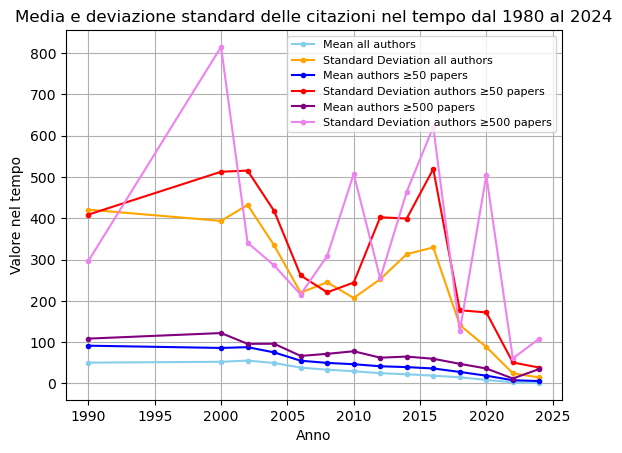

In [148]:
import matplotlib.pyplot as plt

# Mean values for each temporal segment
mean_values_24 = [50.25842074313144, 52.3129383667551, 55.293139953419434, 49.39229778354509, 38.23988965927568, 33.16526357636027, 29.495275356749865, 24.68530220704596, 22.113478089222266, 18.697972217530143, 14.818603901395177, 8.374591377213493, 2.7143724567938157, 1.1514018691588785]
std_dev_values_24 = [420.7594616867615, 393.52788083966107, 432.22906355692896, 334.3909011433602, 219.74437968954334, 244.82818024521268, 206.7757514241077, 252.21857947748532, 313.0842888599383, 329.236900585003, 141.33874955230226, 88.23166634985753, 24.51741930939101, 14.283821084141247]

#norm_mean_values_24 = [0.0003436567204787238, 0.00011441099116378398, 0.00034432962569540444, 0.000234775468238791, 0.00012927135792541752, 9.694554131913951e-05, 7.359633146297976e-05, 5.35866986939332e-05, 4.3650766066368466e-05, 3.7599583780817195e-05, 2.625010433963816e-05, 1.3819480522597386e-05, 4.357334803843528e-05, 0.0007173843421550645]
#norm_std_dev_values_24 = [0.0028770664612144023, 0.0008606649961391162, 0.0026916408038069584, 0.0015894539009861167, 0.0007428539834203033, 0.0007156584300741086, 0.0005159448947755893, 0.0005475145051946775, 0.0006180108347018127, 0.0006620595155059864, 0.00025037155643471974, 0.0001455970494173382, 4.443855851189656e-05, 0.008899576999464951]

mean_values_50_24 = [91.31990997153511, 85.86825704701188, 87.7564698440637, 75.07615623255754, 54.962558819115216, 49.6427407624032, 46.44665367458062, 41.47727150541438, 39.457407826401294, 36.126580323683235, 27.733708211724196, 18.63654138270794, 7.666556293970534, 5.678445229681979]
std_dev_values_50_24 = [408.88779649559604, 512.60055319952, 515.3185443444481, 417.7312110997132, 261.3763810450114, 220.53440761691311, 244.2229329370105, 402.31145390602086, 399.2258025368123, 519.1262778318908, 177.17771044483885, 171.8957154741618, 50.69297328157156, 38.213232489236944]

#norm_mean_values_50_24 = [0.0024696408570607435, 0.00046725175649857094, 0.0011796334311570135, 0.000727905334812464, 0.00036429202199910664, 0.0002869655288244728, 0.00023167377620337195, 0.00018150151847041383, 0.00016039140279098274, 0.00014604741360307256, 9.955455280648219e-05, 7.276061991804298e-05, 4.919881563477186e-06, 0.010419165559049504]
#norm_std_dev_values_50_24 = [0.011057895353749521, 0.002789313735965131, 0.006926976252395361, 0.004050137784561889, 0.0017324035197680953, 0.0012748243133608092, 0.001218172777427565, 0.0017604856137282499, 0.001622822938114819, 0.0020986500668327824, 0.0006360075470598499, 0.0006711137309393944, 0.00028811665671042003, 0.07011602291603108]

mean_values_500_24 = [108.47905282331512, 121.89725151805689, 95.842068237777, 95.99254115226337, 66.5411665257819, 71.6, 77.84267912772586, 62.2941244774733, 64.91268941346253, 59.686044273339746, 47.402763648694474, 36.08587770207755, 11.82943143812709, 34.86363636363637]
std_dev_values_500_24 = [296.8289542271624, 814.8736093347678, 340.90748009606807, 285.61371938971087, 215.19965320558845, 308.6976017396685, 507.16959449103973, 254.3694995691165, 464.35231136496697, 621.0292278281172, 126.62028389165236, 504.0575098094396, 60.550364186618765, 108.40383063281374]

#norm_mean_values_500_24 = [0.10185826556179824, 0.019908092686274192, 0.034500384534836934, 0.025334531842772068, 0.011554291808609464, 0.010734632683658171, 0.010566401401890302, 0.007594066131594941, 0.006964133613717683, 0.006003424288205567, 0.004231633962568691, 0.00320279379622593, 0.001253117737089734, 1.6601731601731604]
#norm_std_dev_values_500_24 = [0.2787126330771478, 0.1330840452939356, 0.12271687548454574, 0.07537970952486431, 0.03736753832359584, 0.04628149951119468, 0.06884343620076554, 0.03100932580386645, 0.04981786410953406, 0.062465221064988655, 0.011303364032463164, 0.044737508636676984, 0.006414233494345208, 5.16208717299113]


years = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Plot the mean values
plt.plot(years, mean_values_24, marker='.', linestyle='-', color='skyblue', label='Mean all authors')

# Plot the standard deviation values
plt.plot(years, std_dev_values_24, marker='.', linestyle='-', color='orange', label='Standard Deviation all authors')

# Plot the mean values
plt.plot(years, mean_values_50_24, marker='.', linestyle='-', color='blue', label='Mean authors ≥50 papers')

# Plot the standard deviation values
plt.plot(years, std_dev_values_50_24, marker='.', linestyle='-', color='red', label='Standard Deviation authors ≥50 papers')

# Plot the standard deviation values
plt.plot(years, mean_values_500_24, marker='.', linestyle='-', color='purple', label='Mean authors ≥500 papers')

# Plot the standard deviation values
plt.plot(years, std_dev_values_500_24, marker='.', linestyle='-', color='violet', label='Standard Deviation authors ≥500 papers')

# Add labels and title
plt.xlabel('Anno')
plt.ylabel('Valore nel tempo')
plt.title('Media e deviazione standard delle citazioni nel tempo dal 1980 al 2024')
plt.legend(fontsize=8)  # Show legend
plt.grid(True)  # Add gridlines
plt.show()

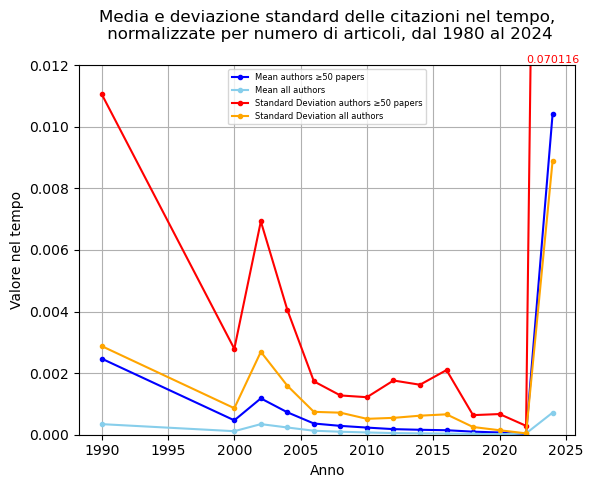

In [97]:
import matplotlib.pyplot as plt

norm_mean_values_24 = [0.0003436567204787238, 0.00011441099116378398, 0.00034432962569540444, 0.000234775468238791, 0.00012927135792541752, 9.694554131913951e-05, 7.359633146297976e-05, 5.35866986939332e-05, 4.3650766066368466e-05, 3.7599583780817195e-05, 2.625010433963816e-05, 1.3819480522597386e-05, 4.357334803843528e-05, 0.0007173843421550645]
norm_std_dev_values_24 = [0.0028770664612144023, 0.0008606649961391162, 0.0026916408038069584, 0.0015894539009861167, 0.0007428539834203033, 0.0007156584300741086, 0.0005159448947755893, 0.0005475145051946775, 0.0006180108347018127, 0.0006620595155059864, 0.00025037155643471974, 0.0001455970494173382, 4.443855851189656e-05, 0.008899576999464951]

# Mean values for each temporal segment
norm_mean_values_50_24 = [0.0024696408570607435, 0.00046725175649857094, 0.0011796334311570135, 0.000727905334812464, 0.00036429202199910664, 0.0002869655288244728, 0.00023167377620337195, 0.00018150151847041383, 0.00016039140279098274, 0.00014604741360307256, 9.955455280648219e-05, 7.276061991804298e-05, 4.919881563477186e-06, 0.010419165559049504]
norm_std_dev_values_50_24 = [0.011057895353749521, 0.002789313735965131, 0.006926976252395361, 0.004050137784561889, 0.0017324035197680953, 0.0012748243133608092, 0.001218172777427565, 0.0017604856137282499, 0.001622822938114819, 0.0020986500668327824, 0.0006360075470598499, 0.0006711137309393944, 0.00028811665671042003, 0.07011602291603108]

norm_mean_values_500_24 = [0.10185826556179824, 0.019908092686274192, 0.034500384534836934, 0.025334531842772068, 0.011554291808609464, 0.010734632683658171, 0.010566401401890302, 0.007594066131594941, 0.006964133613717683, 0.006003424288205567, 0.004231633962568691, 0.00320279379622593, 0.001253117737089734, 1.6601731601731604]
norm_std_dev_values_500_24 = [0.2787126330771478, 0.1330840452939356, 0.12271687548454574, 0.07537970952486431, 0.03736753832359584, 0.04628149951119468, 0.06884343620076554, 0.03100932580386645, 0.04981786410953406, 0.062465221064988655, 0.011303364032463164, 0.044737508636676984, 0.006414233494345208, 5.16208717299113]

years = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Plot the standard deviation values
#plt.plot(years, norm_mean_values_500_24, marker='.', linestyle='-', color='violet', label='mean authors ≥500 papers')

# Plot the mean values for authors with at least 50 papers
plt.plot(years, norm_mean_values_50_24, marker='.', linestyle='-', color='blue', label='Mean authors ≥50 papers')

# Plot the mean values
plt.plot(years, norm_mean_values_24, marker='.', linestyle='-', color='skyblue', label='Mean all authors')

# Plot the standard deviation values
#plt.plot(years, norm_std_dev_values_500_24, marker='.', linestyle='-', color='purple', label='Standard Deviation authors ≥500 papers')

# Plot the standard deviation values for authors with at least 50 papers
plt.plot(years, norm_std_dev_values_50_24, marker='.', linestyle='-', color='red', label='Standard Deviation authors ≥50 papers')

# Plot the standard deviation values for authors with at least 50 papers
plt.plot(years, norm_std_dev_values_24, marker='.', linestyle='-', color='orange', label='Standard Deviation all authors')

# Add labels and title
plt.xlabel('Anno')
plt.ylabel('Valore nel tempo')
plt.title('Media e deviazione standard delle citazioni nel tempo,\n normalizzate per numero di articoli, dal 1980 al 2024\n')
plt.ylim(0, 0.012)
plt.legend(fontsize=6)  # Show legend
plt.grid(True)  # Add gridlines

# Add mean citation value as a text annotation only for the last data point
offset = 0.0003  # Adjust this offset based on your preference
ymax = max(norm_mean_values_50_24[13], norm_std_dev_values_50_24[13])
ypos = min(ymax + offset, 0.012)  # Ensure annotations stay within the y-axis limit

plt.text(years[-1], ypos, f'{norm_std_dev_values_50_24[-1]:.6f}', fontsize=8, ha='center', va='bottom', color ="red")

plt.show()

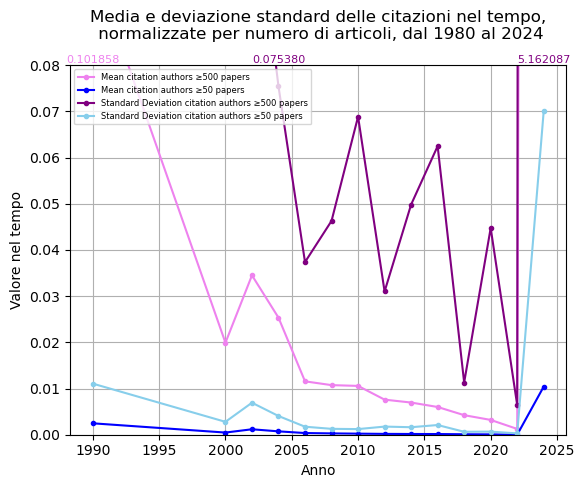

In [98]:
import matplotlib.pyplot as plt

norm_mean_values_24 = [0.0003436567204787238, 0.00011441099116378398, 0.00034432962569540444, 0.000234775468238791, 0.00012927135792541752, 9.694554131913951e-05, 7.359633146297976e-05, 5.35866986939332e-05, 4.3650766066368466e-05, 3.7599583780817195e-05, 2.625010433963816e-05, 1.3819480522597386e-05, 4.357334803843528e-05, 0.0007173843421550645]
norm_std_dev_values_24 = [0.0028770664612144023, 0.0008606649961391162, 0.0026916408038069584, 0.0015894539009861167, 0.0007428539834203033, 0.0007156584300741086, 0.0005159448947755893, 0.0005475145051946775, 0.0006180108347018127, 0.0006620595155059864, 0.00025037155643471974, 0.0001455970494173382, 4.443855851189656e-05, 0.008899576999464951]

# Mean values for each temporal segment
norm_mean_values_50_24 = [0.0024696408570607435, 0.00046725175649857094, 0.0011796334311570135, 0.000727905334812464, 0.00036429202199910664, 0.0002869655288244728, 0.00023167377620337195, 0.00018150151847041383, 0.00016039140279098274, 0.00014604741360307256, 9.955455280648219e-05, 7.276061991804298e-05, 4.919881563477186e-06, 0.010419165559049504]
norm_std_dev_values_50_24 = [0.011057895353749521, 0.002789313735965131, 0.006926976252395361, 0.004050137784561889, 0.0017324035197680953, 0.0012748243133608092, 0.001218172777427565, 0.0017604856137282499, 0.001622822938114819, 0.0020986500668327824, 0.0006360075470598499, 0.0006711137309393944, 0.00028811665671042003, 0.07011602291603108]

norm_mean_values_500_24 = [0.10185826556179824, 0.019908092686274192, 0.034500384534836934, 0.025334531842772068, 0.011554291808609464, 0.010734632683658171, 0.010566401401890302, 0.007594066131594941, 0.006964133613717683, 0.006003424288205567, 0.004231633962568691, 0.00320279379622593, 0.001253117737089734, 1.6601731601731604]
norm_std_dev_values_500_24 = [0.2787126330771478, 0.1330840452939356, 0.12271687548454574, 0.07537970952486431, 0.03736753832359584, 0.04628149951119468, 0.06884343620076554, 0.03100932580386645, 0.04981786410953406, 0.062465221064988655, 0.011303364032463164, 0.044737508636676984, 0.006414233494345208, 5.16208717299113]

years = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Plot the standard deviation values
plt.plot(years, norm_mean_values_500_24, marker='.', linestyle='-', color='violet', label='Mean citation authors ≥500 papers')

# Plot the mean values for authors with at least 50 papers
plt.plot(years, norm_mean_values_50_24, marker='.', linestyle='-', color='blue', label='Mean citation authors ≥50 papers')

# Plot the standard deviation values
plt.plot(years, norm_std_dev_values_500_24, marker='.', linestyle='-', color='purple', label='Standard Deviation citation authors ≥500 papers')

# Plot the standard deviation values for authors with at least 50 papers
plt.plot(years, norm_std_dev_values_50_24, marker='.', linestyle='-', color='skyblue', label='Standard Deviation citation authors ≥50 papers')

# Add labels and title
plt.xlabel('Anno')
plt.ylabel('Valore nel tempo')
plt.title('Media e deviazione standard delle citazioni nel tempo,\n normalizzate per numero di articoli, dal 1980 al 2024\n')
plt.ylim(0, 0.08)
plt.legend(fontsize=6)  # Show legend
plt.grid(True)  # Add gridlines

# Add mean citation value as a text annotation only for the last data point
offset = 0.08  # Adjust this offset based on your preference
ymax = max(norm_mean_values_500_24[12], norm_std_dev_values_500_24[12])
ypos = min(ymax + offset, 0.012)  # Ensure annotations stay within the y-axis limit

plt.text(years[-1], 0.08, f'{norm_std_dev_values_500_24[-1]:.6f}', fontsize=8, ha='center', va='bottom', color="purple")
plt.text(years[0], 0.08, f'{norm_mean_values_500_24[0]:.6f}', fontsize=8, ha='center', va='bottom', color="violet")
plt.text(years[3], 0.08, f'{norm_std_dev_values_500_24[3]:.6f}', fontsize=8, ha='center', va='bottom', color="purple")

plt.show()

In [ ]:
#new and last calculations on citations

In [ ]:
#/////confronto paper id e reference id dal 2000 al 2024

In [17]:
import json

def extract_common_and_non_common_ids(json_data, common_ids_output_file, non_common_ids_output_file):
    reference_ids = set()
    paper_ids = set()
    
    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        paper_id = entry.get("id")  # Get the paper ID
        paper_ids.add(paper_id)
        references = entry.get("references", [])
        reference_ids.update(references)
    
    common_ids = list(paper_ids.intersection(reference_ids))
    non_common_ids = list(paper_ids.difference(reference_ids))
    
    with open(common_ids_output_file, "w") as common_file:
        json.dump(common_ids, common_file)
    
    with open(non_common_ids_output_file, "w") as non_common_file:
        json.dump(non_common_ids, non_common_file)

# Example usage:
json_data_file = '/home/students/mmiot/Last Files/articles_500authors80to00.json'
common_ids_output_file = "/home/students/mmiot/Last Files/common_ids_80to00.json"
non_common_ids_output_file = "/home/students/mmiot/Last Files/non_common_ids_80to00.json"

with open(json_data_file, 'r') as f:
    data = json.load(f)

extract_common_and_non_common_ids(data, common_ids_output_file, non_common_ids_output_file)

In [19]:
import json

def get_citations_for_paper_ids(json_data, paper_ids_file, output_file):
    # Load the list of paper IDs from the second file
    with open(paper_ids_file, 'r') as f:
        paper_ids = json.load(f)
    
    # Create a dictionary to store the number of citations for each paper ID
    citations_dict = {}
    
    # Create a lookup dictionary for quick access to the citation count by paper ID
    paper_id_to_citations = {entry["id"]: entry["n_citation"] for entry in json_data}
    
    # Iterate over each paper ID from the second file and retrieve the number of citations
    for paper_id in paper_ids:
        citations_dict[paper_id] = paper_id_to_citations.get(paper_id, 0)
    
    # Save the citations dictionary to the output file
    with open(output_file, 'w') as f:
        json.dump(citations_dict, f, indent=4)

# Example usage:
json_data_file = 'new_map_final.json'
paper_ids_file = '/home/students/mmiot/Last Files/common_ids_80to00.json'
output_file = '/home/students/mmiot/Last Files/citations_per_paper_common_ids_80to00.json'

#with open(json_data_file, 'r') as f:
    #data = json.load(f)

get_citations_for_paper_ids(data, paper_ids_file, output_file)

In [21]:
import json

def calculate_mean_from_json(input_json_file):
    # Load the JSON file
    with open(input_json_file, 'r') as file:
        data = json.load(file)
    
    # Extract the citation counts
    citation_counts = list(data.values())
    
    # Calculate the mean value
    if len(citation_counts) == 0:
        mean_value = 0
    else:
        mean_value = sum(citation_counts) / len(citation_counts)
    
    return sum(citation_counts), mean_value

# Example usage:
input_json_file = '/home/students/mmiot/Last Files/citations_per_paper_non_common_ids_80to00.json'
mean_value = calculate_mean_from_json(input_json_file)
print(f'The mean citation count is: {mean_value}')

The mean citation count is: (225501, 58.58690568978955)


In [100]:
import json

def count_articles_per_author(json_file_path):
    # Initialize a dictionary to store the number of articles per author
    articles_per_author = {}
    
    # Open the JSON file and load the data
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Iterate over each author id and its associated articles
    for author_id, articles_list in data.items():
        # Check if the author id is already in the dictionary
        if author_id in articles_per_author:
            # If yes, increment the article count
            articles_per_author[author_id] += len(articles_list)
        else:
            # If not, add the author id to the dictionary
            articles_per_author[author_id] = len(articles_list)
    
    # Save the dictionary to a new JSON file
    output_file = "ARperAU1980to2024.json"
    with open(output_file, 'w') as file:
        json.dump(articles_per_author, file, indent=4)
    
    return articles_per_author

# Example usage:
json_file_path = 'articles_per_author_1980_to_2024.json'
articles_count = count_articles_per_author(json_file_path)

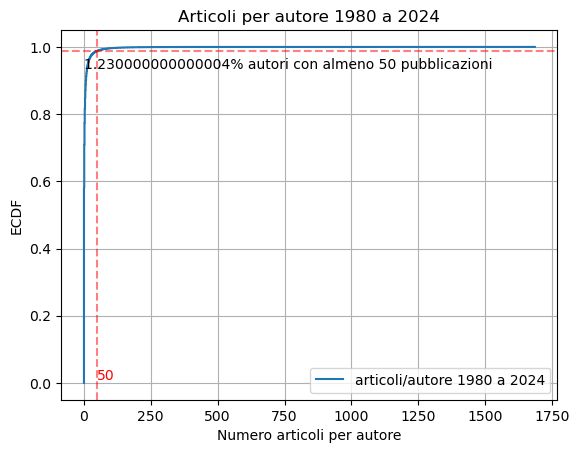

In [141]:
import json
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute the empirical cumulative distribution function."""
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

def plot_ecdf(*json_files, custom_labels=None):
    """Plot the ECDF of the number of articles per author for each input JSON file."""
    # If custom_labels is not provided, use file names as labels
    if custom_labels is None:
        custom_labels = [json_file for json_file in json_files]
    
    # Iterate over each input JSON file and its corresponding custom label
    for i, (json_file, label) in enumerate(zip(json_files, custom_labels), start=1):
        # Load the JSON file
        with open(json_file, 'r') as file:
            json_data = json.load(file)
        
        # Extract the number of articles per author
        articles_per_author = list(json_data.values())
        
        # Compute the ECDF
        x, y = ecdf(articles_per_author)
        
        # Plot the ECDF with custom label
        plt.step(x, y, label=label)  # Use custom label
    
    # Add a vertical dotted line at x=50
    plt.axvline(x=50, linestyle='--', color='red', alpha=0.5)
    
    # Find the ECDF value at x=50
    idx = np.where(x == 50)[0][0]
    y_at_50 = y[idx]
    offset = 0.02
    # Add a horizontal dotted line at y=y_at_50
    plt.axhline(y=y_at_50, linestyle='--', color='red', alpha=0.5)
    plt.text(0, y_at_50 - offset, f'{100 - np.round(y_at_50 * 100, 2)}% autori con almeno 50 pubblicazioni', ha='left', va='top', color='black')  # Label for the horizontal line
    
    # Add a label for the vertical line
    plt.text(50, 0, '50', verticalalignment='bottom', horizontalalignment='left', color='red')
    
    # Set plot labels and legend
    plt.xlabel('Numero articoli per autore')
    plt.ylabel('ECDF')
    plt.legend(loc='lower right')  # Set legend location to lower right
    plt.title('Articoli per autore 1980 a 2024')
    #plt.xscale('log')
    # Show the plot
    plt.grid(True)
    plt.show()
    
# Example usage:
json_dict_1 = '/home/students/mmiot/ArticlesPerAuthors/ARperAU1980to2024.json'

# Example usage with custom labels:
plot_ecdf(json_dict_1,
           custom_labels=['articoli/autore 1980 a 2024'])

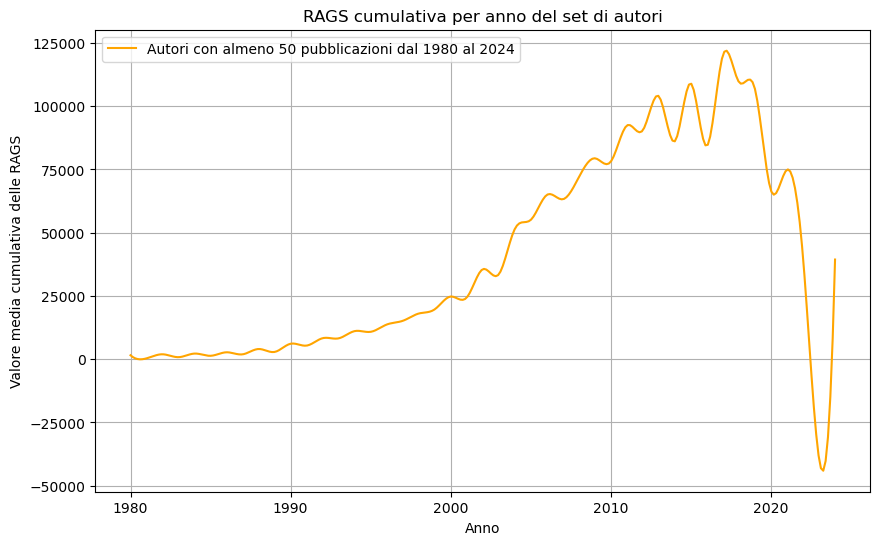

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def calculate_mean_cumulative_rags(json_file_path):
    # Load the JSON file
    with open(json_file_path, "r") as f:
        data = json.load(f)
    
    # Initialize a dictionary to store cumulative RAGS values for each year
    cumulative_rags = {}
    # Initialize a dictionary to store the number of authors contributing to RAGS for each year
    num_authors = {}
    
    # Iterate over each author's RAGS values
    for author_id, rags_values in data.items():
        # Iterate over each year and update cumulative RAGS values
        for year, rags in enumerate(rags_values, start=1980):
            cumulative_rags.setdefault(year, 0)
            cumulative_rags[year] += rags
            #num_authors.setdefault(year, 0)
            #num_authors[year] += 1
    
    # Calculate mean cumulative RAGS for each year
    mean_cumulative_rags = {}
    for year in cumulative_rags:
        mean_cumulative_rags[year] = cumulative_rags[year] #/ num_authors[year]
    
    return mean_cumulative_rags

def plot_mean_cumulative_rags(cumulative_rags, cumulative_rags_2):
    # Extract years and RAGS values
    years = list(cumulative_rags.keys())
    rags_values = list(cumulative_rags.values())
    years_2 = list(cumulative_rags_2.keys())
    rags_values_2 = list(cumulative_rags_2.values())
    
    # Convert lists to numpy arrays for interpolation
    years = np.array(years)
    rags_values = np.array(rags_values)
    years_2 = np.array(years_2)
    rags_values_2 = np.array(rags_values_2)
    
    # Generate new years for smooth plotting
    years_smooth = np.linspace(years.min(), years.max(), 300)
    years_2_smooth = np.linspace(years_2.min(), years_2.max(), 300)
    
    # Create spline functions
    spline_rags = make_interp_spline(years, rags_values, k=3)
    spline_rags_2 = make_interp_spline(years_2, rags_values_2, k=3)
    
    # Generate smooth RAGS values
    rags_values_smooth = spline_rags(years_smooth)
    rags_values_2_smooth = spline_rags_2(years_2_smooth)
    
    # Plot the RAGS graph
    plt.figure(figsize=(10, 6))
    #plt.plot(years_smooth, rags_values_smooth, label='Tutti gli autori dal 1980 al 2024', color='blue')
    plt.plot(years_2_smooth, rags_values_2_smooth, label='Autori con almeno 50 pubblicazioni dal 1980 al 2024', color='orange')
    
    plt.title('RAGS cumulativa per anno del set di autori')
    plt.xlabel('Anno')
    plt.ylabel('Valore media cumulativa delle RAGS')
    plt.grid(True)
    plt.legend()  # Add legend to the plot
    plt.show()

# Example usage:
json_file_path = '/home/students/mmiot/New Files/articles_accumulated_per_year_all_authors.json'
json_file_path_2 = '/home/students/mmiot/New Files/articles_accumulated_per_year_50_authors.json'
cumulative_rags = calculate_mean_cumulative_rags(json_file_path)
cumulative_rags_2 = calculate_mean_cumulative_rags(json_file_path_2)
plot_mean_cumulative_rags(cumulative_rags, cumulative_rags_2)

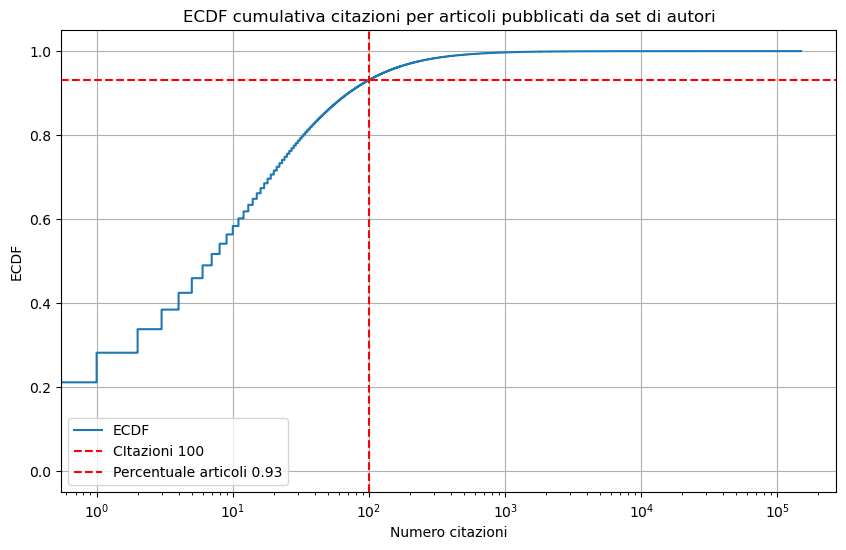

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_ecdf(citations):
    # Sort the citation counts
    sorted_citations = np.sort(list(citations.values()))
    
    # Calculate the cumulative probabilities
    n = len(sorted_citations)
    y = np.arange(1, n + 1) / n
    
    # Plot the cumulative ECDF
    plt.figure(figsize=(10, 6))
    plt.step(sorted_citations, y, where='post', label='ECDF')
    plt.title('ECDF cumulativa citazioni per articoli pubblicati da set di autori')
    plt.xlabel('Numero citazioni')
    plt.ylabel('ECDF')
    plt.grid(True)
    plt.xscale("log")
    
    # Define the x position for the vertical line
    x_val = 10**2
    # Find the y value where the vertical line intersects the ECDF
    y_val = np.interp(x_val, sorted_citations, y)
    
    # Draw the vertical line
    plt.axvline(x=x_val, color='red', linestyle='--', label=f'CItazioni {x_val}')
    # Draw the horizontal line
    plt.axhline(y=y_val, color='red', linestyle='--', label=f'Percentuale articoli {y_val:.2f}')
    
    # Add legend
    plt.legend()
    
    plt.show()

def plot_cumulative_ecdf_from_json(json_file):
    with open(json_file, 'r') as f:
        citations = json.load(f)
    
    plot_cumulative_ecdf(citations)

# Example usage:
json_file = 'citations_articles_authored_by_50_authors.json'
plot_cumulative_ecdf_from_json(json_file)


In [141]:
import json
from collections import defaultdict

def find_venue_connections(articles, output_file):
    # Dictionary to hold lists of articles by their venue
    venue_connections = defaultdict(list)
    
    # Group articles by their venue
    for article in articles:
        venue = article.get('venue_raw', '')
        if venue:
            venue_connections[venue].append(article['id'])
    
    # Filter out venues with only one article (no connection)
    connections = {venue: ids for venue, ids in venue_connections.items() if len(ids) > 1}
    
    # Save the connections to the output JSON file
    with open(output_file, 'w') as f:
        json.dump(connections, f, indent=4)
    
    return connections

# Example usage
input_articles_file = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'
output_connections_file = '/home/students/mmiot/Last Files/raw_connections_entries_with_common_id_3.json'

with open(input_articles_file, 'r') as f:
    articles = json.load(f)

connections = find_venue_connections(articles, output_connections_file)

print(f"Connections based on shared venues saved to: {output_connections_file}")

Connections based on shared venues saved to: /home/students/mmiot/Last Files/raw_connections_entries_with_common_id_3.json


In [145]:
import json
from collections import defaultdict

def find_top_10_total_citations(connection_file, articles_file):
    # Load the connections from the JSON file
    with open(connection_file, 'r') as f:
        connections = json.load(f)
    
    # Load the articles from the JSON file
    with open(articles_file, 'r') as f:
        articles = json.load(f)
    
    # Create a dictionary to map article IDs to their citation counts
    article_citations = {article['id']: article.get('n_citation', 0) for article in articles}
    
    # Calculate total citations for each venue
    venue_citations = defaultdict(int)
    
    for venue, article_ids in connections.items():
        for article_id in article_ids:
            venue_citations[venue] += article_citations.get(article_id, 0)
    
    # Sort venues by total citations in descending order and get top 10
    top_10_total_citations = sorted(venue_citations.items(), key=lambda x: x[1], reverse=True)[:10]
    
    return top_10_total_citations

# Example usage
connection_file = '/home/students/mmiot/Last Files/raw_connections_entries_with_common_id_3.json'
articles_file = '/home/students/mmiot/Last Files/articles_500authors00to24.json'

top_10_total_citations = find_top_10_total_citations(connection_file, articles_file)

print("Top 10 venues by total citations:")
for venue, total_citations in top_10_total_citations:
    print(f"Venue: {venue}, Total Citations: {total_citations}")

Top 10 venues by total citations:
Venue: IEEE Transactions on Wireless Communications, Total Citations: 86496
Venue: IEEE Trans. Pattern Anal. Mach. Intell., Total Citations: 62411
Venue: IEEE Journal on Selected Areas in Communications, Total Citations: 62371
Venue: Communications of the ACM, Total Citations: 55114
Venue: IEEE Trans. Knowl. Data Eng., Total Citations: 51448
Venue: IEEE Transactions on Communications, Total Citations: 48522
Venue: KDD, Total Citations: 47383
Venue: IEEE Transactions on Image Processing, Total Citations: 45857
Venue: IEEE Communications Magazine, Total Citations: 43219
Venue: ICML, Total Citations: 38232


In [146]:
import json
from collections import defaultdict

def find_top_10_mean_citations(connection_file, articles_file):
    # Load the connections from the JSON file
    with open(connection_file, 'r') as f:
        connections = json.load(f)
    
    # Load the articles from the JSON file
    with open(articles_file, 'r') as f:
        articles = json.load(f)
    
    # Create a dictionary to map article IDs to their citation counts
    article_citations = {article['id']: article.get('n_citation', 0) for article in articles}
    
    # Calculate citations for each venue
    venue_citations = defaultdict(list)
    
    for venue, article_ids in connections.items():
        for article_id in article_ids:
            venue_citations[venue].append(article_citations.get(article_id, 0))
    
    # Calculate mean citations for each venue
    venue_mean_citations = {venue: sum(citations)/len(citations) for venue, citations in venue_citations.items() if citations}
    
    # Sort venues by mean citations in descending order and get top 10
    top_10_mean_citations = sorted(venue_mean_citations.items(), key=lambda x: x[1], reverse=True)[:10]
    
    return top_10_mean_citations

# Example usage
connection_file = '/home/students/mmiot/Last Files/raw_connections_entries_with_common_id_3.json'
articles_file = '/home/students/mmiot/Last Files/articles_500authors00to24.json'

top_10_mean_citations = find_top_10_mean_citations(connection_file, articles_file)

print("Top 10 venues by mean citations:")
for venue, mean_citations in top_10_mean_citations:
    print(f"Venue: {venue}, Mean Citations: {mean_citations}")

Top 10 venues by mean citations:
Venue: Communications of the ACM, Mean Citations: 9185.666666666666
Venue: International Conference on Machine Learning, Mean Citations: 3395.3333333333335
Venue: SSST@EMNLP, Mean Citations: 3044.0
Venue: 2016 Fourth International Conference on 3D Vision (3DV), Mean Citations: 2793.0
Venue: Journal of Machine Learning Research, Mean Citations: 2626.8571428571427
Venue: international conference on learning representations, Mean Citations: 2175.625
Venue: AISTATS, Mean Citations: 1741.4444444444443
Venue: ubiquitous computing, Mean Citations: 1429.5
Venue: Audio- and Video-Based Biometric Person Authentication, Mean Citations: 1363.5
Venue: Computational Linguistics, Mean Citations: 1322.0


In [147]:
import json
from collections import defaultdict

def find_top_10_venues_by_articles(connection_file):
    # Load the connections from the JSON file
    with open(connection_file, 'r') as f:
        connections = json.load(f)
    
    # Create a dictionary to store the count of articles for each venue
    venue_articles_count = {venue: len(articles) for venue, articles in connections.items()}
    
    # Sort venues by the number of articles in descending order
    top_10_venues = sorted(venue_articles_count.items(), key=lambda x: x[1], reverse=True)[:10]
    
    return top_10_venues

# Example usage
connection_file = '/home/students/mmiot/Last Files/raw_connections_entries_with_common_id_3.json'

top_10_venues = find_top_10_venues_by_articles(connection_file)

print("Top 10 venues by total articles:")
for venue, article_count in top_10_venues:
    print(f"- Venue: {venue}, Articles: {article_count}")

Top 10 venues by total articles:
- Venue: IEEE Transactions on Wireless Communications, Articles: 914
- Venue: IEEE Transactions on Communications, Articles: 564
- Venue: IEEE Transactions on Vehicular Technology, Articles: 468
- Venue: IEEE Journal on Selected Areas in Communications, Articles: 452
- Venue: Neurocomputing, Articles: 343
- Venue: Lecture Notes in Computer Science, Articles: 314
- Venue: IEEE Transactions on Image Processing, Articles: 279
- Venue: ICC, Articles: 251
- Venue: IEEE Transactions on Signal Processing, Articles: 245
- Venue: IEEE Internet of Things Journal, Articles: 244


In [29]:
import json

def filter_entries_by_ids(data, ids_file, output_file):
        
        # Filter entries by IDs
        filtered_data = [entry for entry in data if entry['id'] in ids]
        
        # Save the filtered data to a new JSON file
        with open(output_file, 'w') as f:
            json.dump(filtered_data, f, indent=4)
        
        print(f"Filtered data saved to {output_file}")

# Example usage
data_file = 'new_map_final_2000_to_2024.json'
ids_file = '/home/students/mmiot/Last Files/non_common_ids_3.json'

# Load the JSON data
#with open(data_file, 'r') as f:
    #data = json.load(f)

with open(ids_file, 'r') as f:
    ids = set(json.load(f))
    
output_file = '/home/students/mmiot/Last Files/entries_with_non_common_id_00to24.json'

filter_entries_by_ids(data, ids, output_file)

Filtered data saved to /home/students/mmiot/Last Files/entries_with_non_common_id_00to24.json


In [14]:
import json

def calculate_citations_stats(data):
    total_citations = 0
    num_entries = 0
    
    # Iterate over each entry in the data
    for entry in data:
        n_citation = entry.get("n_citation", 0)
        total_citations += n_citation
        num_entries += 1
    
    # Calculate the mean citations
    mean_citations = total_citations / num_entries if num_entries > 0 else 0
    
    return total_citations, mean_citations

# Example usage
json_file_path = '/home/students/mmiot/articles_50authors80to24.json'
# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

total_citations, mean_citations = calculate_citations_stats(data)
print(f"Total Citations: {total_citations}")
print(f"Mean Citations: {mean_citations}")

Total Citations: 87397120
Mean Citations: 37.005598022125334


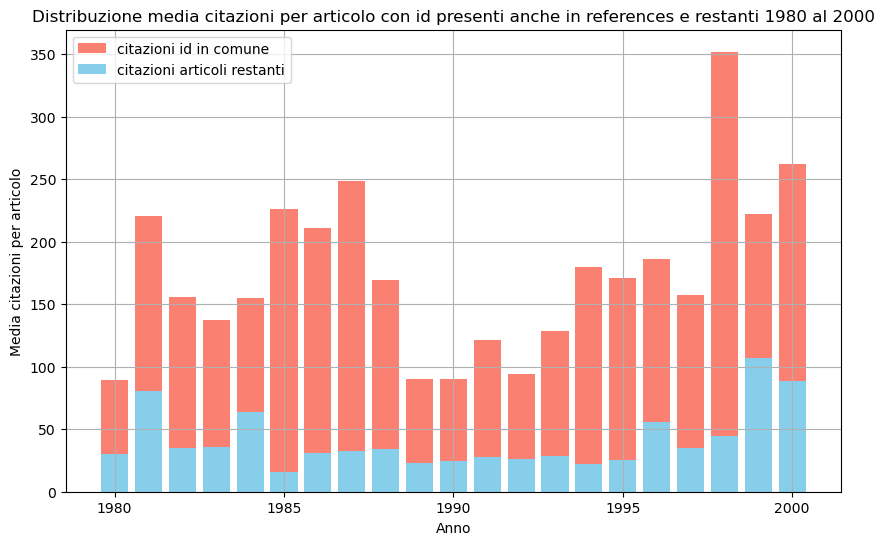

In [41]:
import json
import matplotlib.pyplot as plt

def calculate_normalized_citation_distribution(json_data):
    citation_distribution = {}
    article_count = {}

    # Initialize citation distribution and article count for years 2000 to 2024
    for year in range(1980, 2001):
        citation_distribution[year] = 0
        article_count[year] = 0

    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        year = entry.get("year", 0)
        # Check if the entry's year is within the range 2000 to 2024
        if 1980 <= year <= 2000:
            # Increment the citation count and article count for the corresponding year
            citation_distribution[year] += entry.get("n_citation", 0)
            article_count[year] += 1

    # Calculate normalized citation distribution (average citations per article) for each year
    normalized_citation_distribution = {}
    for year in range(1980, 2001):
        if article_count[year] > 0:
            normalized_citation_distribution[year] = citation_distribution[year] / article_count[year]
        else:
            normalized_citation_distribution[year] = 0

    return normalized_citation_distribution

# Example usage:
json_file_path_1 = '/home/students/mmiot/Last Files/entries_with_common_id_80to00.json'
json_file_path_2 = '/home/students/mmiot/Last Files/entries_with_non_common_id_80to00.json'

with open(json_file_path_1, "r") as f:
    dataset_1 = json.load(f)
with open(json_file_path_2, "r") as f:
    dataset_2 = json.load(f)

citation_distribution_1 = calculate_citation_distribution(dataset_1)
citation_distribution_2 = calculate_citation_distribution(dataset_2)

normalized_citation_distribution_1 = calculate_normalized_citation_distribution(dataset_1)
normalized_citation_distribution_2 = calculate_normalized_citation_distribution(dataset_2)

# Plotting the normalized citation distributions together
plt.figure(figsize=(10, 6))

# Plot bars for the first dataset (articles with common IDs)
plt.bar(normalized_citation_distribution_1.keys(), normalized_citation_distribution_1.values(), color='salmon', label='citazioni id in comune')

# Plot bars for the second dataset (remaining articles)
plt.bar(normalized_citation_distribution_2.keys(), normalized_citation_distribution_2.values(), color='skyblue', label='citazioni articoli restanti')

plt.xlabel('Anno')
plt.ylabel('Media citazioni per articolo')
plt.title('Distribuzione media citazioni per articolo con id presenti anche in references e restanti 1980 al 2000')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

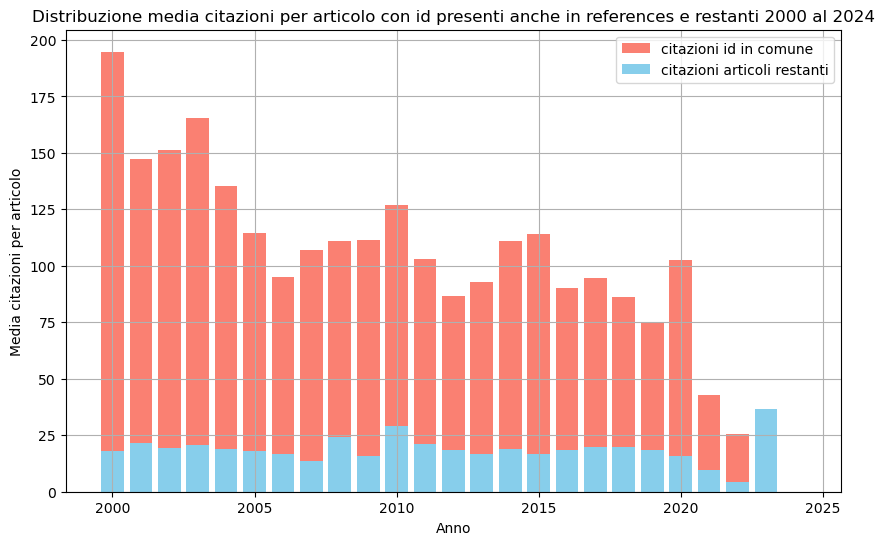

In [42]:
import json
import matplotlib.pyplot as plt

def calculate_normalized_citation_distribution(json_data):
    citation_distribution = {}
    article_count = {}

    # Initialize citation distribution and article count for years 2000 to 2024
    for year in range(2000, 2025):
        citation_distribution[year] = 0
        article_count[year] = 0

    # Iterate over each entry in the JSON dataset
    for entry in json_data:
        year = entry.get("year", 0)
        # Check if the entry's year is within the range 2000 to 2024
        if 2000 <= year <= 2024:
            # Increment the citation count and article count for the corresponding year
            citation_distribution[year] += entry.get("n_citation", 0)
            article_count[year] += 1

    # Calculate normalized citation distribution (average citations per article) for each year
    normalized_citation_distribution = {}
    for year in range(2000, 2025):
        if article_count[year] > 0:
            normalized_citation_distribution[year] = citation_distribution[year] / article_count[year]
        else:
            normalized_citation_distribution[year] = 0

    return normalized_citation_distribution

# Example usage:
json_file_path_1 = '/home/students/mmiot/Last Files/entries_with_common_id_00to24.json'
json_file_path_2 = '/home/students/mmiot/Last Files/entries_with_non_common_id_00to24.json'

with open(json_file_path_1, "r") as f:
    dataset_1 = json.load(f)
with open(json_file_path_2, "r") as f:
    dataset_2 = json.load(f)

normalized_citation_distribution_1 = calculate_normalized_citation_distribution(dataset_1)
normalized_citation_distribution_2 = calculate_normalized_citation_distribution(dataset_2)

# Plotting the normalized citation distributions together
plt.figure(figsize=(10, 6))

# Plot bars for the first dataset (articles with common IDs)
plt.bar(normalized_citation_distribution_1.keys(), normalized_citation_distribution_1.values(), color='salmon', label='citazioni id in comune')

# Plot bars for the second dataset (remaining articles)
plt.bar(normalized_citation_distribution_2.keys(), normalized_citation_distribution_2.values(), color='skyblue', label='citazioni articoli restanti')

plt.xlabel('Anno')
plt.ylabel('Media citazioni per articolo')
plt.title('Distribuzione media citazioni per articolo con id presenti anche in references e restanti 2000 al 2024')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

In [ ]:
#86861 articoli dal 2000 al 2024 500 authors
#38499 in comune, 42265 su 86861 quindi. Minori ma 4750785, 112 media 
#48362 non in comune. Maggiori ma 878327, 17.30932345348127 citazioni

#7188 articoli dal 1980 al 2000 500 authors
#3339 in comune, 3339 su 7188. minori ma 634942 citazioni, 190 media
#3849 non in comune. 225501, 58 di media

In [ ]:
#/////////////////////////////////////////////////////////

In [ ]:
#///////////////UTILITIES

In [ ]:
import json

def filter_articles_by_author(articles, author_ids, output_file):
    
    # Filter articles that contain author IDs present in the author_ids list
    filtered_articles = [
        article for article in articles 
        if any(author_id in author_ids for author_id in article.get('authors_ids', []))
    ]
    
    # Save the filtered articles to the output JSON file
    with open(output_file, 'w') as f:
        json.dump(filtered_articles, f, indent=4)

# Example usage
input_articles_file = 'new_map_final_2000_to_2024.json'
input_authors_file = '/home/students/mmiot/Last Files/authors_with_≥500_publications_until2024.json'

# Load the articles data from the first JSON file
with open(input_articles_file, 'r') as f:
    articles = json.load(f)
    
# Load the author IDs from the second JSON file
with open(input_authors_file, 'r') as f:
    author_ids = set(json.load(f))
    
output_file = '/home/students/mmiot/Last Files/articles_500authors00to24.json'

filter_articles_by_author(articles, author_ids, output_file)

print(f"Filtered articles saved to: {output_file}")

In [129]:
import json

def filter_articles_excluding_author(articles, author_ids, output_file):
    # Filter articles that do not contain author IDs present in the author_ids list
    filtered_articles = [
        article for article in articles 
        if not any(author_id in author_ids for author_id in article.get('authors_ids', []))
    ]
    
    # Save the filtered articles to the output JSON file
    with open(output_file, 'w') as f:
        json.dump(filtered_articles, f, indent=4)

# Example usage
input_articles_file = 'new_map_final_2000_to_2024.json'
input_authors_file = '/home/students/mmiot/Last Files/authors_with_≥500_publications_until2024.json'

# Load the articles data from the first JSON file
with open(input_articles_file, 'r') as f:
    articles = json.load(f)
    
# Load the author IDs from the second JSON file
with open(input_authors_file, 'r') as f:
    author_ids = set(json.load(f))
    
output_file = '/home/students/mmiot/Last Files/articles_NOT500authors00to24.json'

filter_articles_excluding_author(articles, author_ids, output_file)

print(f"Filtered articles saved to: {output_file}")

Filtered articles saved to: /home/students/mmiot/Last Files/articles_NOT500authors00to24.json


In [ ]:
import json

def count_entries(json_file_path):
    # Initialize the count
    count = 0
    
    # Open the JSON file and load the data
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Count the number of entries
    count = len(data)
    
    return count

# Example usage:
json_file_path = '/home/students/mmiot/Last Files/articles_500authors00to24.json'
entries_count = count_entries(json_file_path)
print("Number of entries:", entries_count)

In [ ]:
import json

def get_top_3_authors(json_dict):
    # Sort the dictionary by RAG values in descending order
    sorted_authors = sorted(json_dict.items(), key=lambda item: item[1], reverse=True)
    
    # Extract the top 3 author IDs
    top_3_authors = [author_id for author_id, rag_value in sorted_authors[:3]]
    
    return top_3_authors

# Example usage:
json_file = "/home/students/mmiot/New Files/researchers_mean_rags_50_authors.json"

with open(json_file, 'r') as f:
        citations = json.load(f)

top_3_authors = get_top_3_authors(citations)
print(top_3_authors)

In [ ]:
import json

def get_entry_by_id(input_file, target_id):
    with open(input_file, 'r') as f:
        data = json.load(f)
        for entry in data:
            if entry["id"] == target_id:
                return entry
    # If the target_id is not found, return None
    return None

# Example usage
input_file = "new_map_final.json"
target_id = "53e99796b7602d9701f5e8cf"
result = get_entry_by_id(input_file, target_id)
print(result)

In [32]:
import json

def count_entries(json_file_path):
    # Initialize the count
    count = 0
    
    # Open the JSON file and load the data
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Count the number of entries
    count = len(data)
    
    return count

# Example usage:
json_file_path = '/home/students/mmiot/Last Files/articles_500authors00to24.json'
entries_count = count_entries(json_file_path)
print("Number of entries:", entries_count)

Number of entries: 86861


In [ ]:
#/////////////////////////////////////////////////

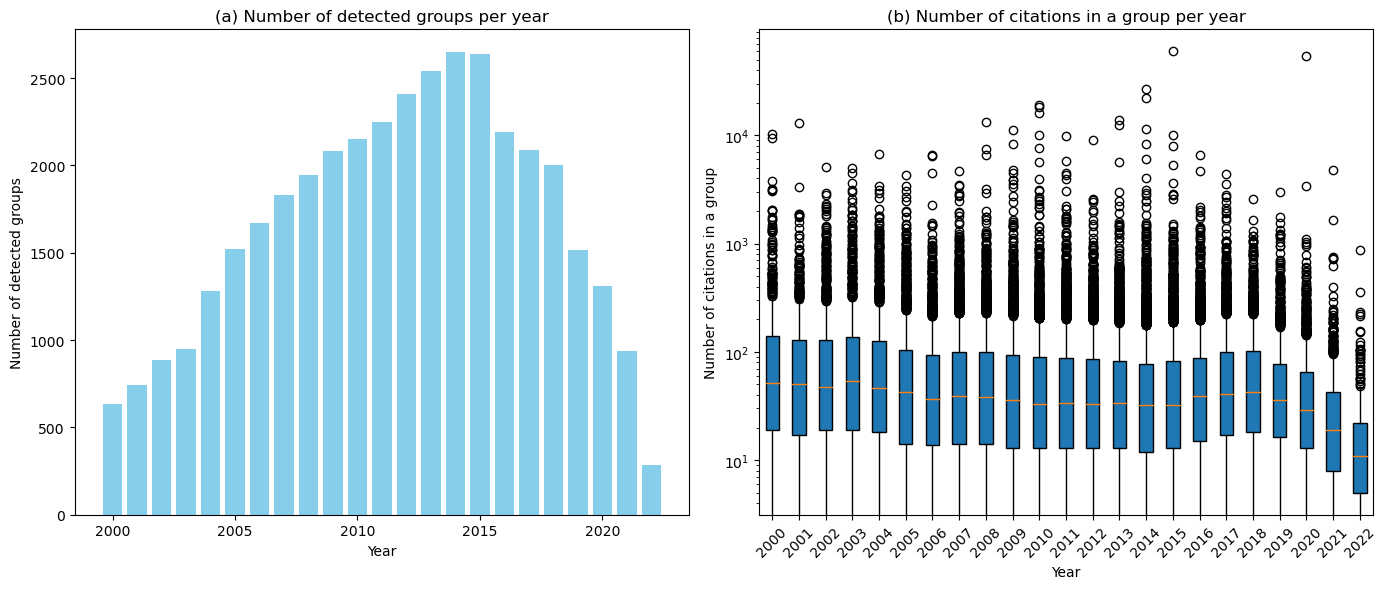

In [152]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'
with open(file_path, 'r') as f:
    data = json.load(f)

# Organize data by year
citations_by_year = {}
for entry in data:
    year = entry['year']
    citations = entry['n_citation']
    if year not in citations_by_year:
        citations_by_year[year] = []
    citations_by_year[year].append(citations)

# Prepare data for plotting
years = sorted(citations_by_year.keys())
number_of_papers = [len(citations_by_year[year]) for year in years]
citation_counts = [citations_by_year[year] for year in years]

plt.figure(figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
plt.bar(years, number_of_papers, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of detected groups')
plt.title('(a) Number of detected groups per year')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(citation_counts, positions=range(len(years)), patch_artist=True)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Number of citations in a group')
plt.title('(b) Number of citations in a group per year')
plt.xticks(ticks=range(len(years)), labels=years, rotation=45)

plt.tight_layout()
plt.show()

In [2]:
import json
import networkx as nx
from concurrent.futures import ThreadPoolExecutor

def construct_citation_network(dataset):
    citation_network = nx.DiGraph()
    for article in dataset:
        citing_journal = article['venue_raw']
        for ref_id in article.get('references', []):
            cited_article = next((a for a in dataset if a['id'] == ref_id), None)
            if cited_article:
                cited_journal = cited_article['venue_raw']
                citation_network.add_edge(citing_journal, cited_journal)
    return citation_network

def identify_journal_clusters(dataset_path, output_path):
    # Load the dataset from JSON file
    with open(dataset_path, 'r') as f:
        dataset = json.load(f)

    # Divide dataset into chunks for parallel processing
    chunk_size = len(dataset) // 4  # Adjust the number of chunks as needed
    dataset_chunks = [dataset[i:i+chunk_size] for i in range(0, len(dataset), chunk_size)]

    # Parallel processing using ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        citation_networks = executor.map(construct_citation_network, dataset_chunks)

    # Combine citation networks from chunks
    citation_network = nx.compose_all(citation_networks)

    # Apply community detection algorithm
    communities = nx.community.greedy_modularity_communities(citation_network)

    # Prepare output dictionary
    clusters_dict = {}
    for i, community in enumerate(communities):
        clusters_dict[f"Cluster {i+1}"] = list(community)

    # Save the output to a new JSON file
    with open(output_path, 'w') as outfile:
        json.dump(clusters_dict, outfile, indent=4)

# Example usage
dataset_path = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'
output_path = '/home/students/mmiot/Last Files/output_clusters.json'
identify_journal_clusters(dataset_path, output_path)

In [3]:
import json
import numpy as np
from sklearn.ensemble import IsolationForest
from concurrent.futures import ThreadPoolExecutor

def calculate_cluster_metrics(cluster, clusters_dict):
    journals = clusters_dict[cluster]
    total_citations_within_cluster = 0
    for journal in journals:
        total_citations_within_cluster += sum(1 for c in clusters_dict if journal in clusters_dict[c])

    average_citations_per_journal = total_citations_within_cluster / len(journals)

    return {
        'total_citations_within_cluster': total_citations_within_cluster,
        'average_citations_per_journal': average_citations_per_journal
    }

def identify_anomalous_clusters(output_clusters_path, output_anomalies_path):
    # Load the output clusters from the JSON file
    with open(output_clusters_path, 'r') as f:
        clusters_dict = json.load(f)

    # Define a function to calculate metrics for each cluster
    def calculate_metrics(cluster):
        return calculate_cluster_metrics(cluster, clusters_dict)

    # Calculate metrics for all clusters using ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        cluster_metrics_list = list(executor.map(calculate_metrics, clusters_dict.keys()))

    # Convert metrics to numpy array for anomaly detection
    X = np.array([[metric['total_citations_within_cluster'], metric['average_citations_per_journal']]
                  for metric in cluster_metrics_list])

    # Apply isolation forest for anomaly detection
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(X)

    # Identify anomalous clusters
    anomalous_clusters_indices = np.where(isolation_forest.predict(X) == -1)[0]
    anomalous_clusters = [list(clusters_dict.keys())[i] for i in anomalous_clusters_indices]

    # Save the identified anomalous clusters to a JSON output file
    with open(output_anomalies_path, 'w') as outfile:
        json.dump(anomalous_clusters, outfile, indent=4)

# Example usage
output_clusters_path = '/home/students/mmiot/Last Files/output_clusters.json'
output_anomalies_path = '/home/students/mmiot/Last Files/output_anomalies.json'
identify_anomalous_clusters(output_clusters_path, output_anomalies_path)

In [5]:
import json

def print_and_save_clusters(clusters):
    # Print the number of clusters
    num_clusters = len(clusters)
    print(f"Number of clusters: {num_clusters}")

# Example usage
# Load the output clusters from the JSON file
with open(output_clusters_path, 'r') as f:
    clusters = json.load(f)
output_path = '/home/students/mmiot/Last Files/count_clusters.json'
print_and_save_clusters(clusters)


Number of clusters: 164


In [11]:
import json
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

def count_citations_per_cluster(clusters_file, articles_file, output_file):
    # Load clusters from JSON file
    with open(clusters_file, 'r') as f:
        clusters = json.load(f)

    # Load articles from JSON file
    with open(articles_file, 'r') as f:
        articles = json.load(f)

    # Create a dictionary to store citation counts per cluster
    citation_counts = defaultdict(int)

    # Create a mapping of article IDs to their respective venues
    article_venues = {article['id']: article['venue_raw'] for article in articles}

    # Define function to count citations for a given article
    def count_citations(article):
        article_id = article['id']
        article_venue = article['venue_raw']
        for cluster, venues in clusters.items():
            if article_venue in venues:
                citation_counts[cluster] += article.get('n_citation', 0)

    # Process articles concurrently using ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        executor.map(count_citations, articles)

    # Save citation counts per cluster to a new output JSON file
    with open(output_file, 'w') as outfile:
        json.dump(citation_counts, outfile, indent=4)

# Example usage
clusters_file = '/home/students/mmiot/Last Files/output_clusters.json'
articles_file = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'
output_file = '/home/students/mmiot/Last Files/citation_counts_per_cluster.json'
count_citations_per_cluster(clusters_file, articles_file, output_file)


In [12]:
import json

def sort_clusters_by_citation_count(input_file, output_file):
    # Load cluster citation counts from JSON file
    with open(input_file, 'r') as f:
        cluster_citation_counts = json.load(f)

    # Sort clusters by citation count in ascending order
    sorted_clusters = sorted(cluster_citation_counts.items(), key=lambda x: x[1])

    # Create a dictionary to store sorted clusters
    sorted_clusters_dict = {}
    for cluster, count in sorted_clusters:
        sorted_clusters_dict[cluster] = count

    # Save sorted clusters to a new output JSON file
    with open(output_file, 'w') as outfile:
        json.dump(sorted_clusters_dict, outfile, indent=4)

# Example usage
input_file = '/home/students/mmiot/Last Files/citation_counts_per_cluster.json'
output_file = '/home/students/mmiot/Last Files/citation_counts_per_cluster_ordered.json'
sort_clusters_by_citation_count(input_file, output_file)

In [13]:
import json

def sum_cluster_values(input_file):
    # Load cluster citation counts from JSON file
    with open(input_file, 'r') as f:
        cluster_citation_counts = json.load(f)

    # Sum up all the values from each cluster
    total_sum = sum(cluster_citation_counts.values())

    return total_sum

# Example usage
input_file = '/home/students/mmiot/Last Files/citation_counts_per_cluster_ordered.json'
total_sum = sum_cluster_values(input_file)
print("Total sum of values from each cluster:", total_sum)

Total sum of values from each cluster: 4032127


In [ ]:
#//////////////////////////////////////////////////////////////////

In [19]:
#Finds mutual references between papers in the entries with common id
import json
from concurrent.futures import ThreadPoolExecutor

def find_mutual_citations(input_file, output_file):
    # Load the dataset
    with open(input_file, 'r') as f:
        papers = json.load(f)

    # Create a reference map
    ref_map = {paper['id']: paper['references'] for paper in papers}
    
    # Function to find mutual citations
    def has_mutual_citation(paper_id, reference_id):
        return paper_id in ref_map.get(reference_id, [])

    # Find groups of mutual citations
    groups = []
    visited = set()

    for paper in papers:
        paper_id = paper['id']
        if paper_id not in visited:
            group = set()
            stack = [paper_id]
            while stack:
                current = stack.pop()
                if current not in visited:
                    visited.add(current)
                    group.add(current)
                    for ref in ref_map.get(current, []):
                        if has_mutual_citation(current, ref):
                            stack.append(ref)
            if group:
                groups.append(list(group))

    # Save the result
    with open(output_file, 'w') as f:
        json.dump(groups, f, indent=4)

# Example usage
articles_file = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'
output_file = '/home/students/mmiot/Last Files/groups.json'
find_mutual_citations(input_file, output_file)

In [21]:
#it counts the citation for each group previously produced
import json
from concurrent.futures import ThreadPoolExecutor

def count_citations_per_group(data_file, groups_file, output_file):
    # Load the dataset
    with open(data_file, 'r') as f:
        papers = json.load(f)
    
    # Load the groups
    with open(groups_file, 'r') as f:
        groups = json.load(f)

    # Create a map for citation counts
    citation_map = {paper['id']: paper.get('n_citation', 0) for paper in papers}

    # Sum citation counts for each group
    group_citations = []
    for group in groups:
        total_citations = sum(citation_map.get(paper_id, 0) for paper_id in group)
        group_citations.append(total_citations)

    # Save the results
    with open(output_file, 'w') as f:
        json.dump(group_citations, f, indent=4)

# Example usage
data_file = '/home/students/mmiot/Last Files/entries_with_common_id_3.json'  # The dataset file
groups_file = '/home/students/mmiot/Last Files/groups.json'  # The groups file produced by the previous function
output_file = 'group_citations_counts.json'  # The output file for citation counts
count_citations_per_group(data_file, groups_file, output_file)


In [63]:
import json

def find_groups_and_count_citations(input_file, output_file):
    # Load the dataset
    with open(input_file, 'r') as f:
        papers = json.load(f)

    # Create a reference map and citation map
    ref_map = {paper['id']: paper['references'] for paper in papers}
    citation_map = {paper['id']: paper.get('n_citation', 0) for paper in papers}

    # Function to find mutual citations
    def has_mutual_citation(paper_id, reference_id):
        return paper_id in ref_map.get(reference_id, [])

    # Find groups of mutual citations
    groups = []
    visited = set()

    for paper in papers:
        paper_id = paper['id']
        if paper_id not in visited:
            group = set()
            stack = [paper_id]
            while stack:
                current = stack.pop()
                if current not in visited:
                    visited.add(current)
                    group.add(current)
                    for ref in ref_map.get(current, []):
                        if has_mutual_citation(current, ref):
                            stack.append(ref)
            if group:
                groups.append(list(group))

    # Sum citation counts for each group
    group_citations = []
    for group in groups:
        total_citations = sum(citation_map.get(paper_id, 0) for paper_id in group)
        group_citations.append({
            "group": group,
            "total_citations": total_citations
        })

    # Save the result
    with open(output_file, 'w') as f:
        json.dump(group_citations, f, indent=4)

# Example usage
input_file = '/home/students/mmiot/Last Files/articles_500authors80to24.json'
output_file = '/home/students/mmiot/Last Files/group_citation_counts_NEW.json'
find_groups_and_count_citations(input_file, output_file)

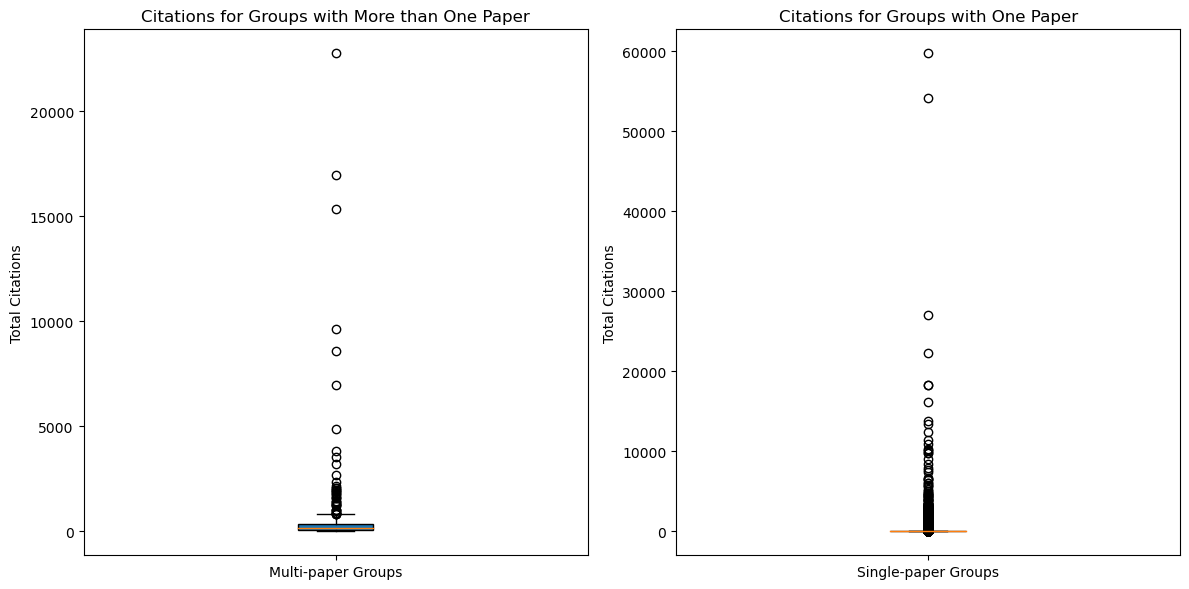

In [30]:
import json
import matplotlib.pyplot as plt

def plot_group_citations(group_citations_file):
    # Load the group citation data
    with open(group_citations_file, 'r') as f:
        group_citations = json.load(f)
    
    # Separate the groups
    multi_paper_groups = [group['total_citations'] for group in group_citations if len(group['group']) > 1]
    single_paper_groups = [group['total_citations'] for group in group_citations if len(group['group']) == 1]
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    
    # Box plot for multi-paper groups
    plt.subplot(1, 2, 1)
    plt.boxplot(multi_paper_groups, patch_artist=True)
    plt.title('Citations for Groups with More than One Paper')
    plt.ylabel('Total Citations')
    plt.xticks([1], ['Multi-paper Groups'])
    
    # Box plot for single-paper groups
    plt.subplot(1, 2, 2)
    plt.boxplot(single_paper_groups, patch_artist=True)
    plt.title('Citations for Groups with One Paper')
    plt.ylabel('Total Citations')
    plt.xticks([1], ['Single-paper Groups'])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
group_citations_file = '/home/students/mmiot/Last Files/group_citation_counts_NEW.json'
plot_group_citations(group_citations_file)

In [31]:
import json
import numpy as np

def find_anomalous_citation_groups(input_file, output_file, z_score_threshold=2):
    # Load the groups with citation counts
    with open(input_file, 'r') as f:
        group_citations = json.load(f)

    # Extract the citation counts
    citation_counts = [group['total_citations'] for group in group_citations]

    # Calculate mean and standard deviation
    mean_citations = np.mean(citation_counts)
    std_citations = np.std(citation_counts)

    # Identify anomalous groups using z-scores
    anomalous_groups = []
    for group in group_citations:
        z_score = (group['total_citations'] - mean_citations) / std_citations
        if abs(z_score) > z_score_threshold:
            anomalous_groups.append({
                "group": group['group'],
                "total_citations": group['total_citations'],
                "z_score": z_score
            })

    # Save the anomalous groups
    with open(output_file, 'w') as f:
        json.dump(anomalous_groups, f, indent=4)

# Example usage
input_file = '/home/students/mmiot/Last Files/group_citation_counts_NEW.json'
output_file = 'anomalous_groups.json'
find_anomalous_citation_groups(input_file, output_file)

In [46]:
import json

def filter_groups_by_years(group_file_path, article_file_path, output_file_path, target_years):
    # Load the group data from the first JSON file
    with open(group_file_path, "r") as group_file:
        groups = json.load(group_file)

    # Load the article data from the second JSON file
    with open(article_file_path, "r") as article_file:
        articles = json.load(article_file)

    # Create a dictionary to quickly access article data by article id
    article_dict = {article['id']: article for article in articles}

    # Filter groups that contain more than one article published in the target years
    filtered_groups = []
    for group in groups:
        article_years = [article_dict[paper_id]['year'] for paper_id in group['group'] if paper_id in article_dict]
        if len(article_years) == 1 and any(year in target_years for year in article_years):
            filtered_groups.append(group)

    # Save the filtered groups to a new JSON file
    with open(output_file_path, "w") as output_file:
        json.dump(filtered_groups, output_file, indent=4)

# Example usage:
group_file_path = '/home/students/mmiot/Last Files/group_citation_counts_NEW.json'
article_file_path = '/home/students/mmiot/Last Files/articles_500authors80to24.json'
output_file_path = '/home/students/mmiot/NEW_FILE_1.json'
target_years = {1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, }

filter_groups_by_years(group_file_path, article_file_path, output_file_path, target_years)

In [65]:
import json

def calculate_overall_average_citations(input_file_path):
    # Load the group data from the JSON file
    with open(input_file_path, "r") as input_file:
        groups = json.load(input_file)

    # Initialize total citations and total number of papers
    total_citations = 0
    total_papers = 0

    # Iterate over each group to sum up citations and count papers
    for group in groups:
        total_citations += group['total_citations']
        total_papers += len(group['group'])

    # Calculate the overall average number of citations per paper
    overall_average_citations = total_citations / total_papers if total_papers > 0 else 0

    return overall_average_citations

# Example usage:
input_file_path = '/home/students/mmiot/NEW_FILE.json'

overall_average = calculate_overall_average_citations(input_file_path)
print(f"Overall average citations per paper: {overall_average}")

Overall average citations per paper: 157.0952380952381


In [60]:
import json

def count_large_groups(input_file_path):
    # Load the group data from the JSON file
    with open(input_file_path, "r") as input_file:
        groups = json.load(input_file)

    # Initialize counter for groups with 2 or more members
    large_group_count = 0

    # Iterate over each group to count those with 2 or more members
    for group in groups:
        if len(group['group']) >= 2:
            large_group_count += 1

    return large_group_count

# Example usage:
input_file_path = '/home/students/mmiot/Last Files/group_citation_counts_00to24_comm.json'

large_groups_count = count_large_groups(input_file_path)
print(f"Number of groups with 2 or more members: {large_groups_count}")

Number of groups with 2 or more members: 384
